**Apple Product Management Team**<br>
**Social Media Listening Evaluation Report**<br>
**Team Members:** Ashlyn Im, Linda Hung, Shih-Ting Sun, Wan-Ju Yu<br>
**andrewID:** manyii, tzutingh, shihtins, wyu2

# **Motivation: Business Problem**

The number of internet users has exploded tremendously in the last decade as a result of technological advancements. The amount of data generated by people's engagement on the internet has increased dramatically. Amidst the noise is a wealth of knowledge regarding customers’ opinions and feedback that we can tap into. Apple's core values have always been prioritizing people over products. We're eager to hear from users through social media listening, a new way to analyze and collect customers' thoughts via natural language processing. Particularly, we are interested in answering these questions:

- How do the customers feel generally towards the products?
- What attributes drive customers' interest in purchasing the product?
- Could we predict whether a person adopt/uptake the product based on the post?

To conduct this, we will mainly be looking at the social media data in 2017, when our major competitor, Samsung, launched their Samsung Galaxy S8 flagship product. Later in the same year, we also launched iPhone 8 and iPhone X. The timeframe provides us a fair foundation for comparison. Regarding the sources, we have collected data from the following sources: instagram,  tumblr, facebook, twitter, blogs, forums, comments, consumer reviews, and other social media.

**The whole project pipeline will be divided into 8 steps:**

**Step 0: Load the Package**

**Step 1: Load the File**

**Step 2: Data Preprocessing**
- 2.1 Remove Irrelevant Rows
- 2.2 Summary Statistics
- 2.3 Exploratory Data Analysis
- 2.4 Feature Engineering: Category and Before/After Launch
- 2.5 Handle Null Values
- 2.6 Pre-processing Text Data

**Step 3: Demographic Analysis**
- 3.1 Overview of Demographics
- 3.2 Compare US vs. Non-US

**Step 4: Sentiment Analysis**
 - 4.1 Overall Sentiment
 - 4.2 Sentiment Before VS After Launch

**Step 5: Attribute Analysis**
- 5.1 Topic Modelling
- 5.2 POS Analysis
- 5.3 Hashtag Frequency
- 5.4 Sentiment Analysis for Product Attributes

**Step 6: Predictive Analysis**
- 6.1 Feature Engineering
- 6.2 Prediction of Product Uptake
- 6.3 Model Fitting

**Step 7: Comparison between Twitter and Non-Twitter Dataset**
- 7.1 Exploratory Data Analysis of Twitter and Non-Twitter Dataset
- 7.2 Word Frequency for Twitter and Non-Twitter Dataset
- 7.3 Hashtag for Twitter and Non-Twitter Dataset
- 7.4 Sentiment Analysis for Product Attributes for Twitter and Non-Twitter Dataset

**Step 8: Recommendation in Product Life Cycle**
- 8.0 Development: Attribute Enhancement
- 8.1 Introduction: Informative Marketing
- 8.2 Growth: Persuasive Marketing: Persuasive Marketing
- 8.3 Maturity: Product Consolidation
- 8.4 Decline: Pivoting


###** Notice! **
It takes three hours in total to run the whole python code.

# **Step 0: Load the Package**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# pip install wordcloud

In [ ]:
# Load data
import os
import glob
from tqdm import tqdm
from joblib import Parallel, delayed
from tqdm import tqdm

# Data exploration
import pandas as pd
import numpy as np
import pandas_profiling
from datetime import datetime, date, timedelta
from scipy import stats
import math

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Data preprocessing
from scipy.stats.mstats import winsorize
from scipy.special import boxcox1p
from sklearn import preprocessing
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from datetime import datetime
from statistics import mean
from operator import itemgetter

# Natural language processing package
import re
import spacy
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import tokenize
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

# Data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Formatting
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows", 200)
%config InlineBackend.figure_format = 'retina'


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Step 1: Load the File**

In [ ]:
def loop(file):
    return pd.read_excel(file)

Since it takes a long time to use usual packages for loading. To fasten the loading time, we will be using the joblib package. It writes parallel for loops using multiprocessing. Reference: https://joblib.readthedocs.io/en/latest/parallel.html

In [ ]:
# Take 5 minutes to load
temp = Parallel(n_jobs=-1, verbose=10)(delayed(loop)(file) for file in glob.glob("./gdrive/MyDrive/Colab Notebooks/nontweet/*"))
df_non_tweet = pd.concat(temp, ignore_index=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  8.1min finished


In [ ]:
temp = Parallel(n_jobs=-1, verbose=10)(delayed(loop)(file) for file in glob.glob("./gdrive/MyDrive/Colab Notebooks/tweet/*"))
df_tweet = pd.concat(temp, ignore_index=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.2min finished


Let's preview the data columns and sample rows for both tweets and non-tweets.

In [ ]:
df_non_tweet.columns

Index(['Post ID', 'Sound Bite Text', 'Ratings and Scores', 'Title',
       'Source Type', 'Post Type', 'Media Type', 'URL', 'Domain',
       'Published Date (GMT-04:00) New York', 'Author Gender', 'Author URL',
       'Author Name', 'Author Handle', 'Author ID',
       'Author Location - Country 1', 'Author Location - State/Province 1',
       'Author Location - City 1', 'Author Location - Country 2',
       'Author Location - State/Province 2', 'Author Location - City 2',
       'Author Location - Other', 'No. of Followers/Daily Unique Visitors',
       'Professions', 'Interests', 'Positive Objects', 'Negative Objects',
       'Richness', 'Tags', 'Quoted Post', 'Quoted Author Name',
       'Quoted Author Handle', 'Total Engagements', 'Post Comments',
       'Post Likes', 'Post Shares', 'Post Views', 'Post Dislikes',
       'Product Name', 'Product Hierarchy', 'Rating'],
      dtype='object')

In [ ]:
df_non_tweet.head(5)

,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Media Type,URL,Domain,Published Date (GMT-04:00) New York,...,Quoted Author Handle,Total Engagements,Post Comments,Post Likes,Post Shares,Post Views,Post Dislikes,Product Name,Product Hierarchy,Rating
0,114219621960016_1335643603150939_1288030881293500,"Samsung Galaxy s8 , Designed for self defense.",NaN,NaN,Facebook,Replies and Comments,No Media,http://www.facebook.com/114219621960016/posts/1335643603150939?comment_id=1288030881293500,facebook.com,"Mar 30, 2017 6:13:14 AM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,114219621960016_1335643603150939_116687878871930,Single sim version of galaxy s8 in India please?,NaN,NaN,Facebook,Replies and Comments,No Media,http://www.facebook.com/114219621960016/posts/1335643603150939?comment_id=116687878871930,facebook.com,"Mar 30, 2017 6:50:03 AM",...,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,126761694007536_1678117398871950_1679130838770606,The Samsung Galaxy S8 will be released on the 28th April 2017 in the UK and across Europe. To get yours early make sure to pre-order now at shop.samsung.com/uk ^AO,NaN,NaN,Facebook,Replies and Comments,Link,http://www.facebook.com/126761694007536/posts/1678117398871950?comment_id=1679130838770606,facebook.com,"Mar 30, 2017 7:58:27 AM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,post_159006163596_188342999,"Samsung's Galaxy S8 phone aims to dispel the Note 7 debacle Technology Samsung’s Galaxy S8 phone aims to dispel the Note 7 debacle Samsung seems to be playing it safe —at least with its battery — as it unveils its first major smartphone since the embarrassing recall of its fire-prone Note 7. The Galaxy S8 will come in two sizes, both bigger than comparable models from last year. To maximize display space, there’s no more physical home button. That’s a big bet that its phones will justify a higher price, whereas it could have used these new phones as a way to drive higher sales after a couple of years of stagnation.",NaN,Samsung's Galaxy S8 phone aims to dispel the Note 7 debacle,Tumblr,Original,No Media,https://tumblr.com/ZZqSNn2K5WOAC,tumblr.com,"Mar 30, 2017 1:14:39 PM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45297b8c17.1356284.460,"They trying to push this for the future? Is it meant to improve usability? Hands On With Samsung's Galaxy S8 and S8+: Taller Screens and Slimmer Bezels Originally Posted by Anandtech Both Samsung and LG cite market research for this new display direction: People want larger screens that can show more content, but they also want phones that are useable with one hand and can fit in their pocket. The taller screen fits more content, so less scrolling, but keeps the phone narrow, so its easier to wrap your hand around. Both S8 phones incorporate another emerging design trend: rounded display corners.",NaN,NaN,Forums,Replies and Comments,No Media,http://www.neogaf.com/forum/showthread.php?t=1356284&page=10#460,neogaf.com,"Mar 30, 2017 12:01:00 PM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_tweet.columns

Index(['Post ID', 'Sound Bite Text', 'Ratings and Scores', 'Title',
       'Source Type', 'Post Type', 'Media Type', 'URL', 'Domain',
       'Published Date (GMT-04:00) New York', 'Author Gender', 'Author URL',
       'Author Name', 'Author Handle', 'Author ID',
       'Author Location - Country 1', 'Author Location - State/Province 1',
       'Author Location - City 1', 'Author Location - Country 2',
       'Author Location - State/Province 2', 'Author Location - City 2',
       'Author Location - Other', 'No. of Followers/Daily Unique Visitors',
       'Professions', 'Interests', 'Positive Objects', 'Negative Objects',
       'Richness', 'Tags', 'Quoted Post', 'Quoted Author Name',
       'Quoted Author Handle', 'Total Engagements', 'Post Comments',
       'Post Likes', 'Post Shares', 'Post Views', 'Post Dislikes',
       'Product Name', 'Product Hierarchy', 'Rating'],
      dtype='object')

In [ ]:
df_tweet.head(5)

,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Media Type,URL,Domain,Published Date (GMT-04:00) New York,...,Quoted Author Handle,Total Engagements,Post Comments,Post Likes,Post Shares,Post Views,Post Dislikes,Product Name,Product Hierarchy,Rating
0,876715038895202307,RT @grattongirl: iPhone 8 To Feature 5G Internet Speed Being Tested By Apple? bit.ly/2sIS11f pic.twitter.com/xMY6l09DjW,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/KevinAMoon/statuses/876715038895202307,twitter.com,"Jun 19, 2017 4:15:28 AM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,864017688661721088,"RT @iDeviceCare: The price of the iPhone 8 will start at $ 1000, according to Goldman Sachs idevicecaregh.com/2017/05/15/pri… pic.twitter.com/Alo6pCsRBF",NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/jerryluti/statuses/864017688661721088,twitter.com,"May 15, 2017 3:20:44 AM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,880243202267258880,RT @9to5mac: What iOS 11 tells us about the iPhone 8 9to5mac.com/2017/06/28/wha… pic.twitter.com/D9IEcCTqbM,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/IssaNY25/statuses/880243202267258880,twitter.com,"Jun 28, 2017 9:55:08 PM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,854083902402580480,Samsung Galaxy S8 and S8 Plus undergo a Battery Drain Test dlvr.it/Nw2J7p pic.twitter.com/tMYr4VLyTr,NaN,NaN,Twitter,Original,Image; Link,http://twitter.com/gdelussigny/statuses/854083902402580480,twitter.com,"Apr 17, 2017 5:27:25 PM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,857765152434860034,"""Another iPhone 8 leak hints at wireless charging"" ---- Always late to the party #apple tcrn.ch/2pDZ6hP",NaN,NaN,Twitter,Original,Link,http://twitter.com/trothwell_null/statuses/857765152434860034,twitter.com,"Apr 27, 2017 9:15:23 PM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As the columns of tweets and non-tweets are the same and we can identify twitter posts from the "Source Type", we can merge the two dataframes together for the preprocessing step.

In [ ]:
df = df_non_tweet.append(df_tweet, ignore_index=True)

# **Step 2: Data Preprocessing**

In [ ]:
df.shape

(512821, 41)

## 2.1 Remove Irrelevant Rows

Before any preprocessing, we know that some of the rows are irrelevant. To avoid misinformation, we will remove them first.

### 2.1.1 Excel Sources


Eliminate the details, sources on the dates etc. at the bottom of each excel file. <br>
Process only the original posts rather than
replies and comments (Column: Post Type).

In [ ]:
filter_list = ["Widget Name", "Topic Name", "Filters", "If your topic is scaled to 100%, the number of exported sound bites might differ from the total mentions count.",
              "Export Date", "Tweets above the 50,000 daily Tweet download limit have been omitted from the export."]

df = df[df["Post ID"].isin(filter_list) == False]
df = df[df["Post ID"] != np.nan]
df = df[df["Post Type"] == "Original"]

### 2.1.2 Professional and Celebrities Endorsement

Eliminate posts from authors that have a large number of followers as they will likely be professionals or celebrities.
 
According to the research from the Advertising Standards Authority in the UK, which could be applied to the US context since social media are boundryless, anyone with over 30,000 social media followers as a "celebrity". Therefore, we will use 30,000 as a threshold. Source: https://www.thedrum.com/news/2019/07/04/asa-defines-anyone-with-over-30000-social-media-followers-celebrity

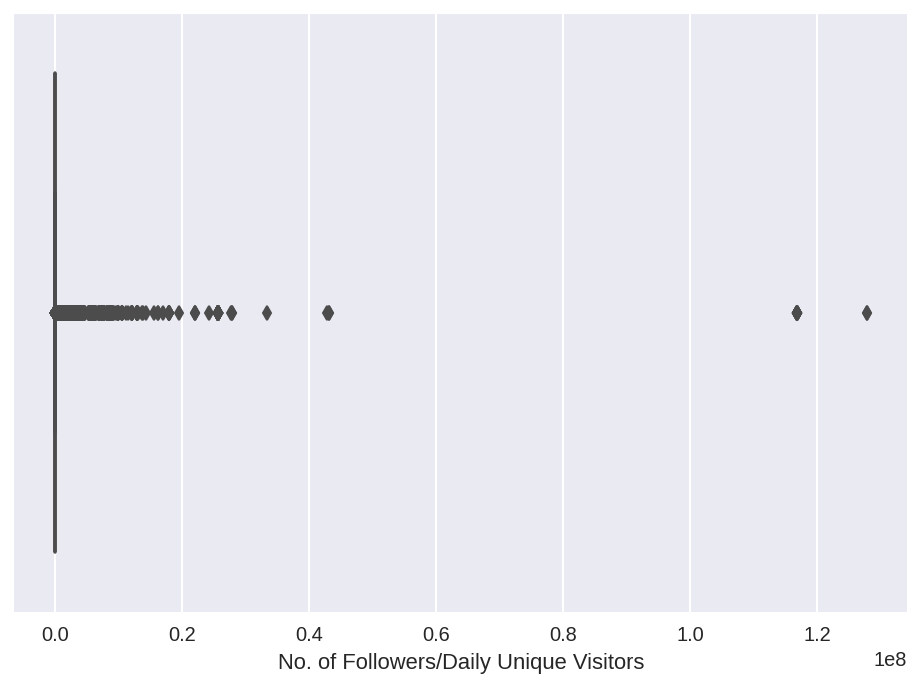

In [ ]:
sns.boxplot(x=df["No. of Followers/Daily Unique Visitors"])

In [ ]:
df = df[df["No. of Followers/Daily Unique Visitors"] <= 30000]

### 2.1.3 Duplicated Rows

Lastly, we will drop the duplicated rows as they are likely to be advertisements.

In [ ]:
# Drop duplicate columns and dulplicate posts
df.drop_duplicates(inplace = True)
df = df.drop_duplicates(subset = "Sound Bite Text") 

## 2.2 Summary Statistics

We would like to take a look at the high level statistics first regarding data shape, column statistics and missing values.

In [ ]:
df.shape

(330447, 41)

Upon removal of the unnecessary information above, we have in total 330447 rows for the remaining analysis.

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Post ID,330447,329154,https://forums.evga.com:443/New-Phone-time-LGSamsungNokia-m2640978.aspx.18,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sound Bite Text,330447,330447,"Samsung's Galaxy S8 phone aims to dispel the Note 7 debacle Technology Samsung’s Galaxy S8 phone aims to dispel the Note 7 debacle Samsung seems to be playing it safe —at least with its battery — as it unveils its first major smartphone since the embarrassing recall of its fire-prone Note 7. The Galaxy S8 will come in two sizes, both bigger than comparable models from last year. To maximize display space, there’s no more physical home button. That’s a big bet that its phones will justify a higher price, whereas it could have used these new phones as a way to drive higher sales after a couple of years of stagnation.",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ratings and Scores,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,225271,121828,Pinned to AndroBrix on Pinterest,1122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source Type,330447,9,Blogs,136447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Post Type,330447,1,Original,330447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media Type,330447,15,No Media,145794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URL,330447,311808,https://forums.evga.com:443/New-iPhone-8-Renders-m2666292.aspx,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domain,330447,18977,tumblr.com,67174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Published Date (GMT-04:00) New York,330447,257079,"Sep 22, 2017 8:00:00 PM",249,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330447 entries, 3 to 512807
Data columns (total 41 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Post ID                                 330447 non-null  object 
 1   Sound Bite Text                         330447 non-null  object 
 2   Ratings and Scores                      0 non-null       float64
 3   Title                                   225271 non-null  object 
 4   Source Type                             330447 non-null  object 
 5   Post Type                               330447 non-null  object 
 6   Media Type                              330447 non-null  object 
 7   URL                                     330447 non-null  object 
 8   Domain                                  330447 non-null  object 
 9   Published Date (GMT-04:00) New York     330447 non-null  object 
 10  Author Gender                           3304

The summary statistics shows that the dataframe has some large missing values in certain columns. Fortunately, our focus of the analysis "Sound Bite Text" does not have any null values.

## 2.3 Exploratory Data Analysis

Visualizing the data could give us some interesting insights into the overall user portfolio of our data. In the following section, we will visualize categorical variables in the form of bar charts and numerical variables in the form of histograms.

In [ ]:
categorical_columns = ["Source Type", "Media Type"]
numerical_columns = ["No. of Followers/Daily Unique Visitors", "Total Engagements", "Post Comments", "Post Likes"]

### 2.3.1 Categorical Variables

Text(0, 0.5, 'Count')

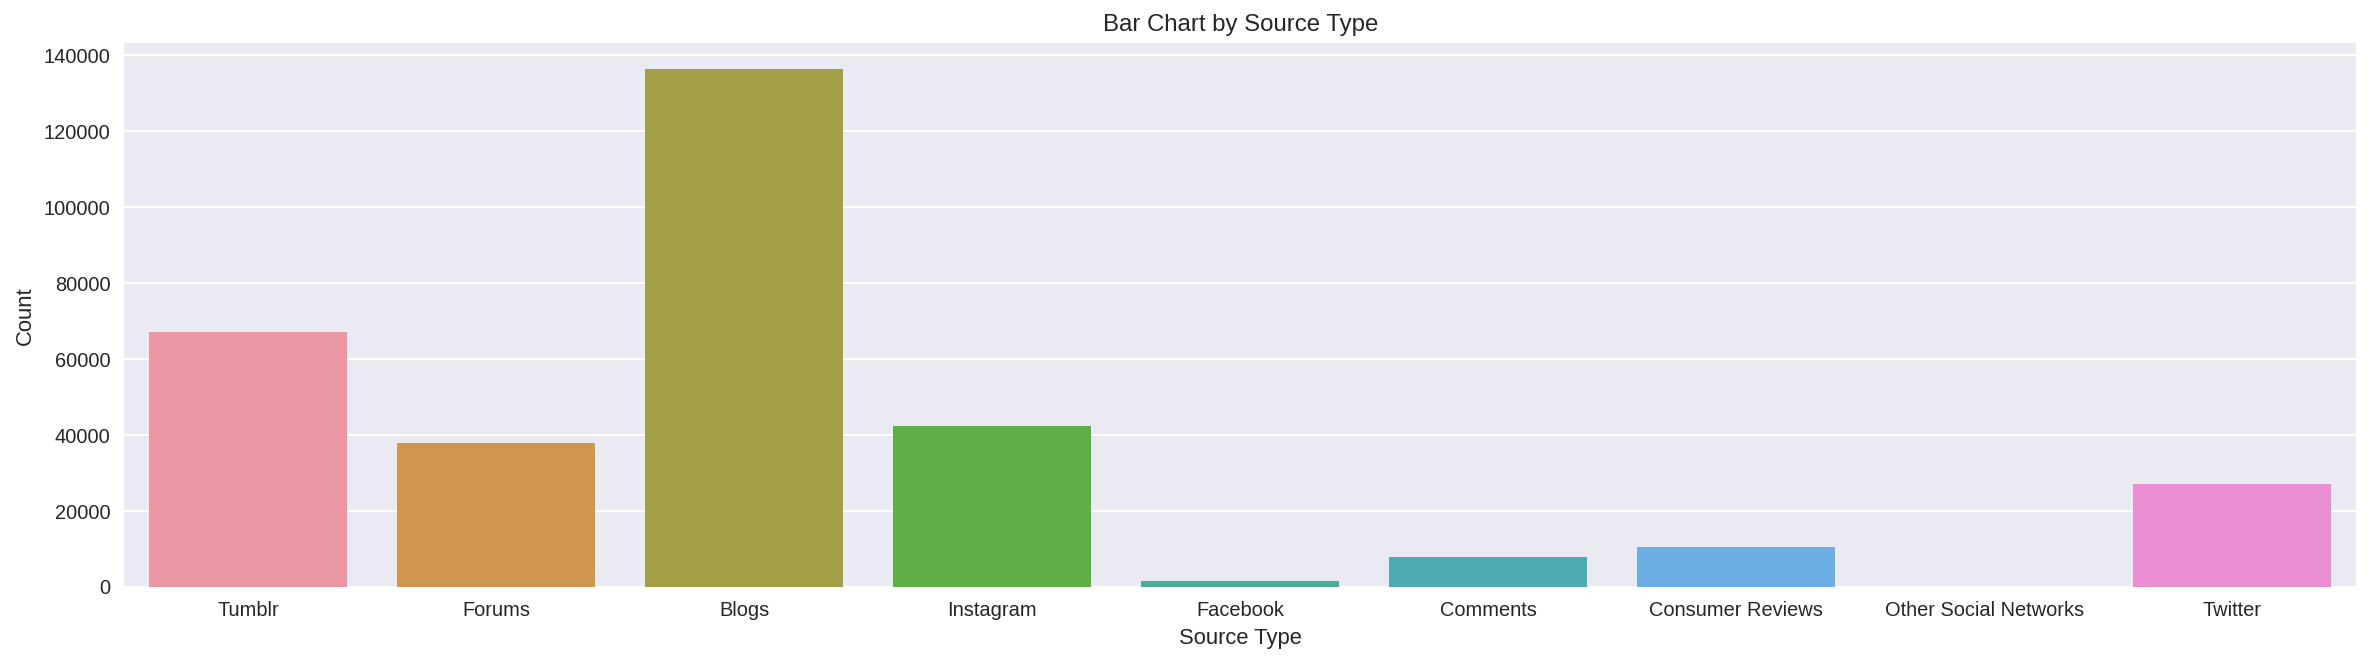

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(df["Source Type"])
plt.title('Bar Chart by Source Type')
plt.xlabel('Source Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

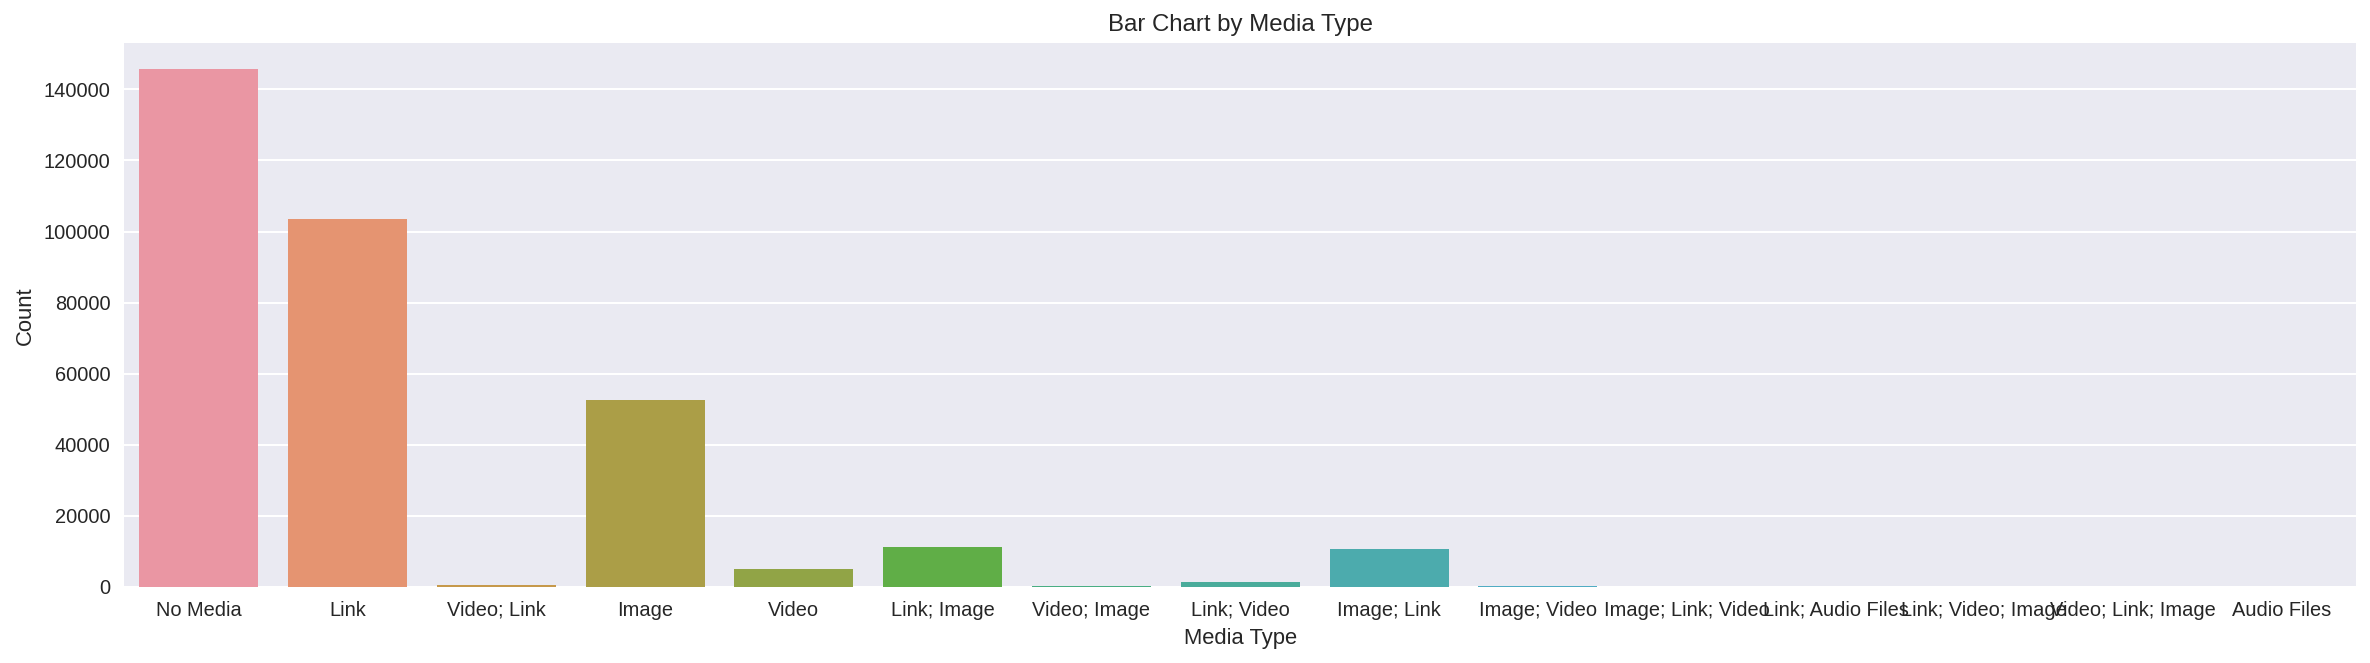

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(df["Media Type"])
plt.title('Bar Chart by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Count')

### 2.3.2 Numerical variables

4it [00:00, 16.54it/s]


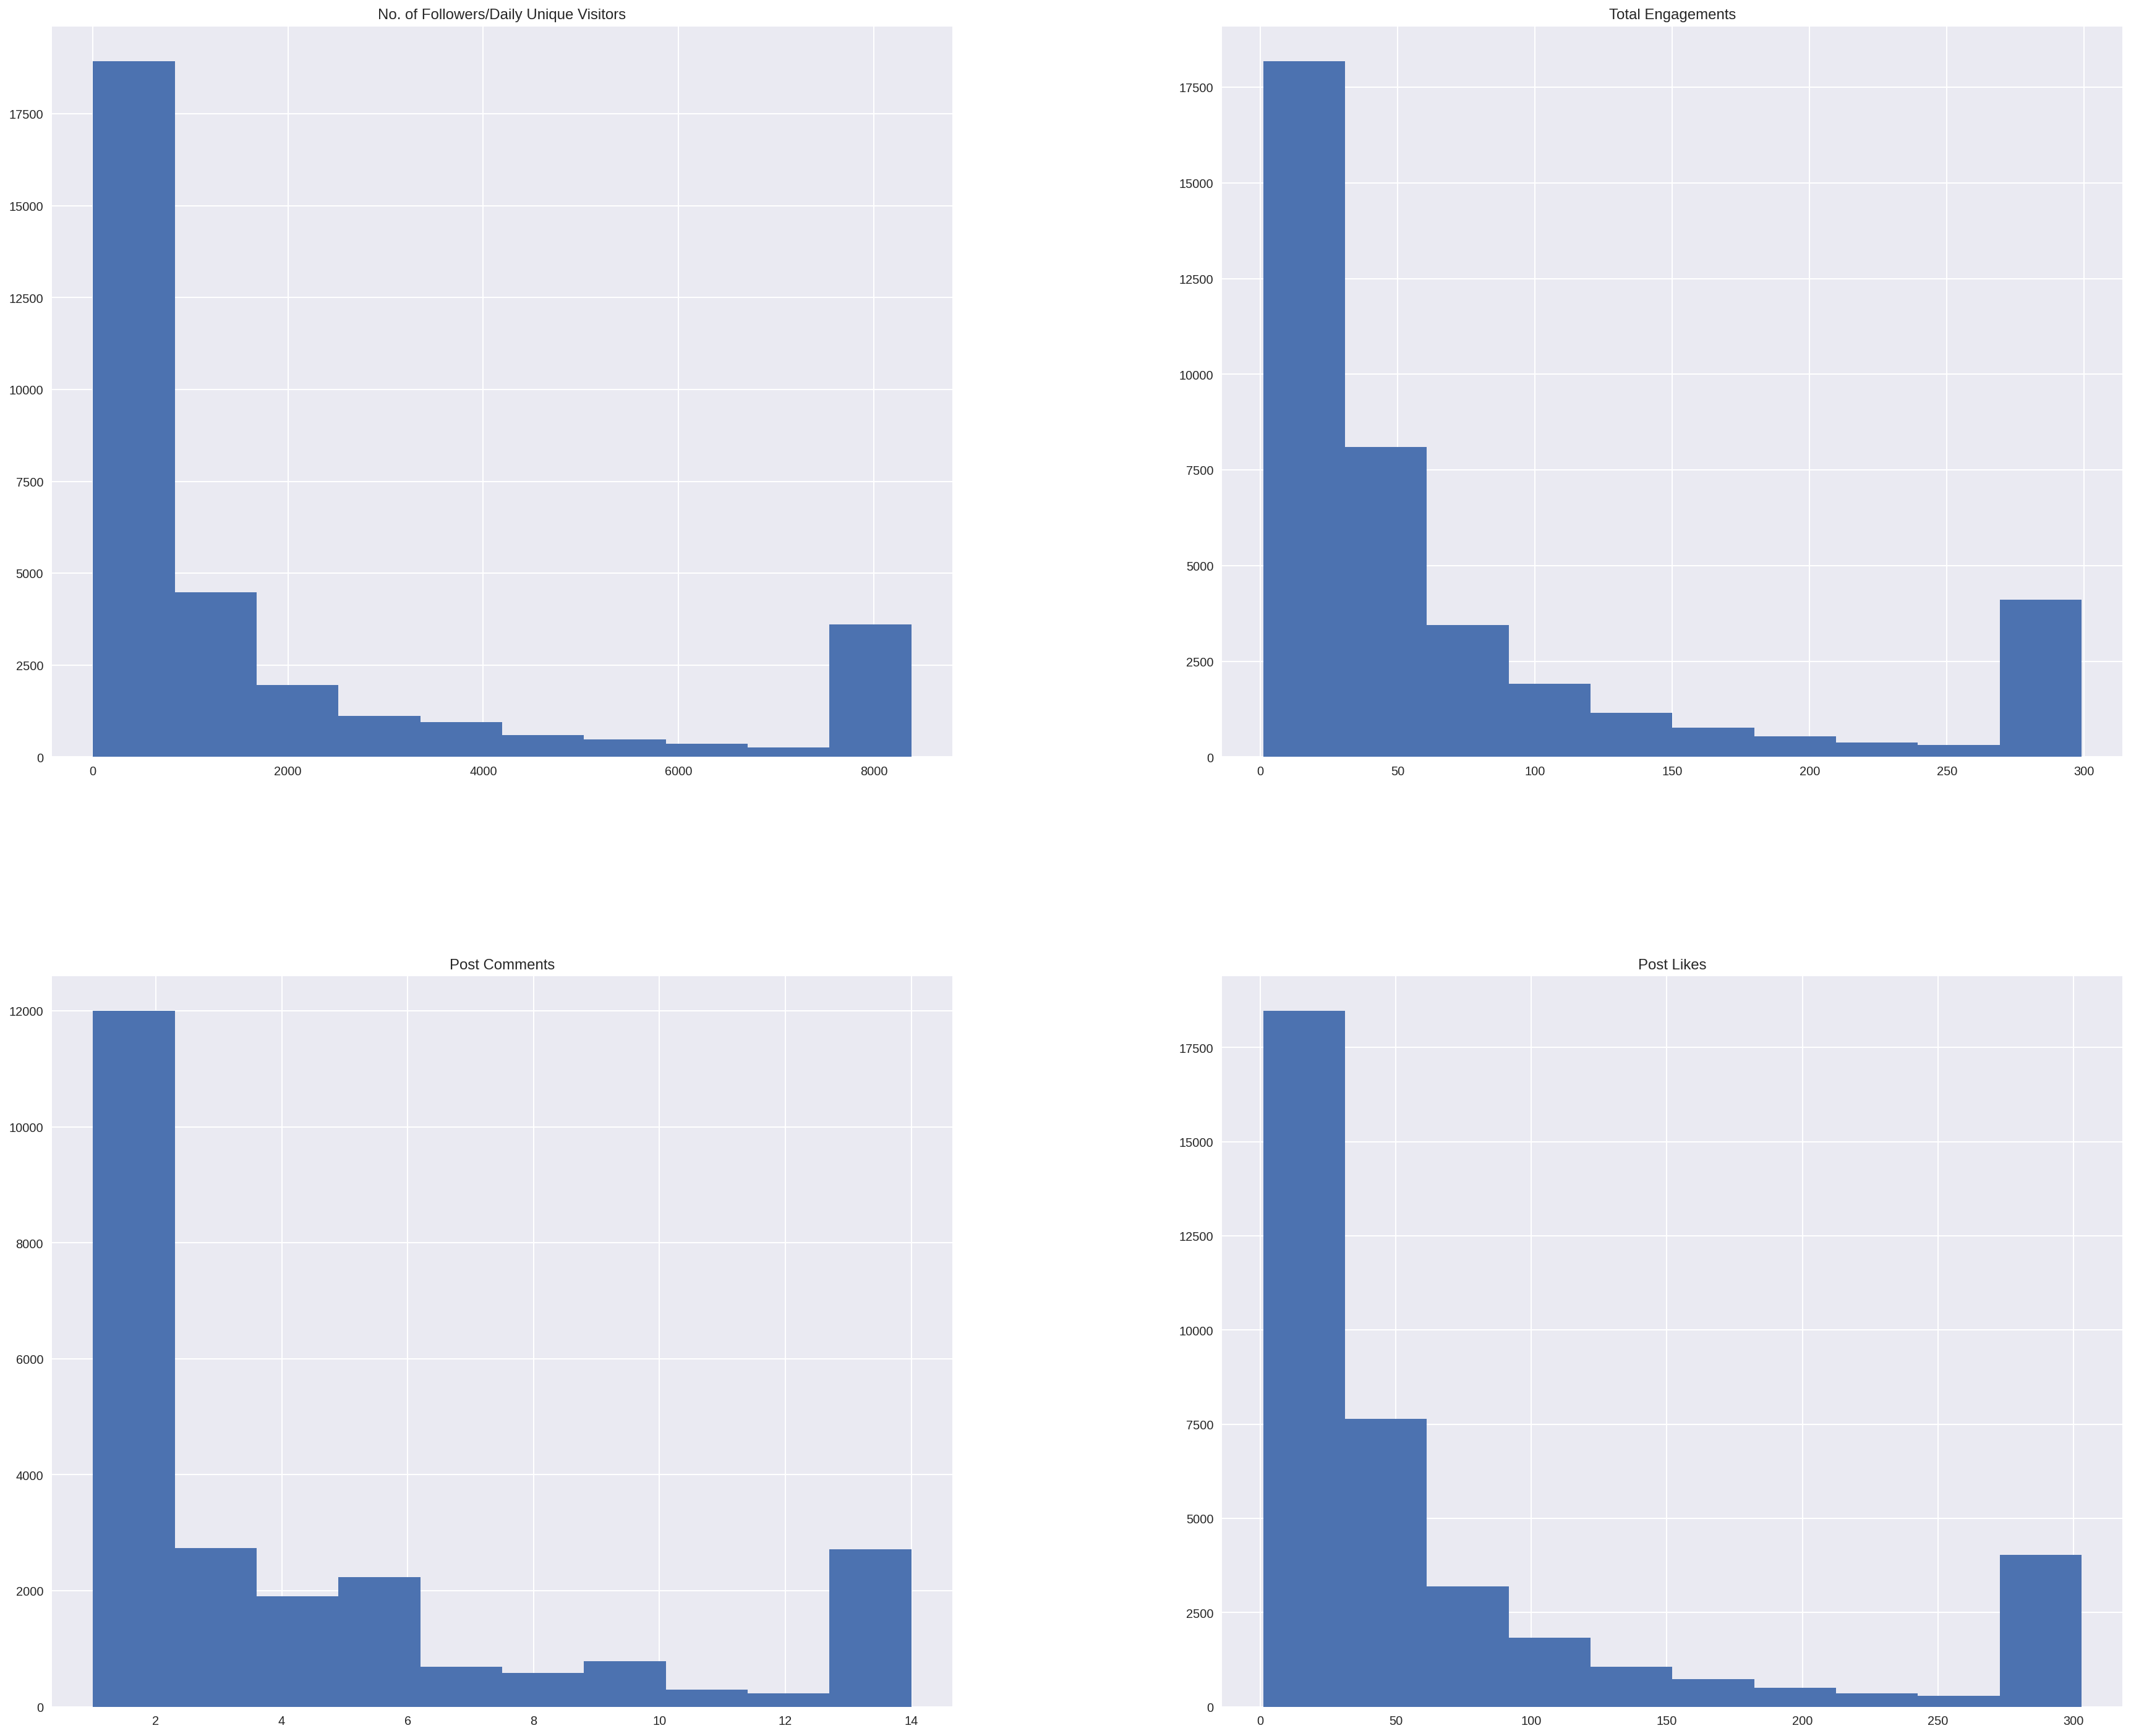

In [ ]:
n_rows=2
n_cols=2

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(30, 25)
for i, column in tqdm(enumerate(numerical_columns)):
    # Remove 0 and winsorize for better visualization
    df_temp = df[df[column] > 0]
    df_temp[column] = winsorize(df_temp[column], (0.01,0.1))
    df_temp.hist(column,ax=axes[i//n_cols,i%n_cols], bins= 10)

## 2.4 Feature Engineering: Category and Before/After Launch

After performing some exploratory data analysis, we will proceed on to feature engineering. For this part, we will extract the Category (iPhone or Samsung or both) from "Sound Bite Text" and Before/After Launch from the "Published Date" for convenient identification.

### 2.4.1 Category

In [ ]:
# Define function to Count number of tweets in each iphone or samsung group
def GetCategory(tw):
    if ('iphone8' or 'iphone 8' or 'i8' or 'iphonex' or 'iphone x' or 'iphone 10' or 'iphone10' or 'i10') in tw:
        if 's8' in tw:
            return 'both'
        else:
            return 'iphone'
    elif 's8' in tw:
        return 's8'
    else:
        return 'none'

# Define function to store iphone8 or s8 index in index link
iphone_indices = []
s8_indices = []
both_indices = []
none_indices = []

def IndexCategory(text_array):        
    for index in text_array.index:
        subject = GetCategory(str(text_array[index]).lower())
        if subject == 'iphone':
            iphone_indices.append(index)
        elif subject == 's8':
            s8_indices.append(index)
        elif subject == 'both':
            both_indices.append(index)
        else:
            none_indices.append(index)

In [ ]:
IndexCategory(df['Sound Bite Text'])
print("The total number of text:" , len(df['Sound Bite Text']))
print("The number of Samsung text:", len(s8_indices))
print("The number of iPhone text:", len(iphone_indices))
print("The number of both Samsung and iPhone text:", len(both_indices))
print("The number of non-related text", len(none_indices))

The total number of text: 330447
The number of Samsung text: 180231
The number of iPhone text: 14825
The number of both Samsung and iPhone text: 775
The number of non-related text 134616


In [ ]:
# Define function to Count number of tweets in each iphone8 and iphone10
def iPhoneCategory(tw): 
    if ('iphone8' or 'iphone 8' or 'i8') in tw:
        if ('iphonex' or 'iphone x' or 'iphone 10' or 'iphone10' or'i10') in tw: 
            return 'both_iphone8_iphonex'
        else:
            return 'iphone8'
    elif ('iphonex' or 'iphone x' or 'iphone 10' or 'iphone10' or'i10') in tw: 
        return 'iphonex'
    
iphone8_indices = []
iphone10_indices = [] 
both_iphone8_iphone10_indices = []
    
def iPhoneIndex(text_array):
    for index in text_array.index:
        subject = iPhoneCategory(str(text_array[index]).lower())
        if subject == 'iphone8':
              iphone8_indices.append(index)
        elif subject == 'iphonex':
              iphone10_indices.append(index)
        elif subject == 'both_iphone8_iphonex':
              both_iphone8_iphone10_indices.append(index)
                

In [ ]:
iphone_text = df["Sound Bite Text"][iphone_indices]
iPhoneIndex(iphone_text)
print("The total number of iphone text:", len(iphone_indices))
print("The number of both iphone8 and iphone10 text:", len(both_iphone8_iphone10_indices))
print("The number of iphone8 only text:",len(iphone8_indices))
print("The number of iphone10 only text:", len(iphone10_indices))

The total number of iphone text: 14825
The number of both iphone8 and iphone10 text: 2765
The number of iphone8 only text: 12060
The number of iphone10 only text: 0


In [ ]:
# Add phone type column
IndexCategory(df["Sound Bite Text"]) 
df["Phone_Type"] = None
df["Phone_Type"][none_indices] = 0
df["Phone_Type"][iphone_indices] = 1
df["Phone_Type"][s8_indices] = 2
df["Phone_Type"][both_indices] = 3

In [ ]:
# Count number of tweets in each group
print("No. of iphone-only tweets: %d" % len(iphone_indices))
print("No. of Samsung galaxy s8-only tweets: %d" % len(s8_indices))
print("No. of mixed tweets: %d" % len(both_indices))
print("No. of tweets in neither: %d" % len(none_indices))

No. of iphone-only tweets: 29650
No. of Samsung galaxy s8-only tweets: 360462
No. of mixed tweets: 1550
No. of tweets in neither: 269232


Text(0, 0.5, 'Count')

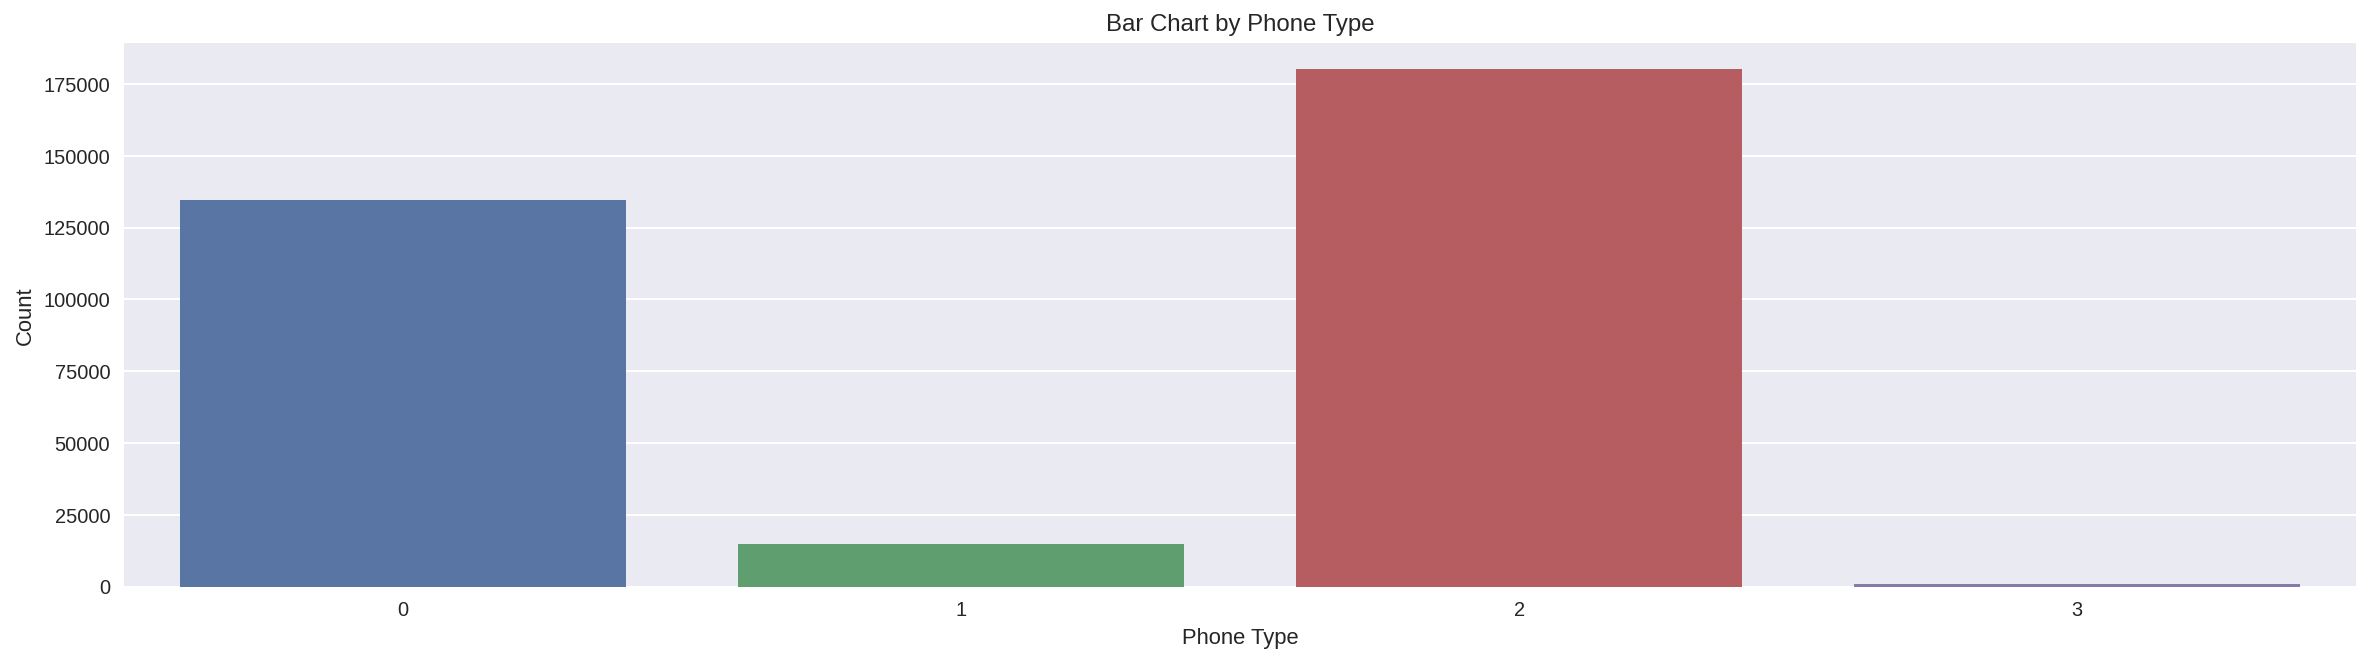

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(df["Phone_Type"])
plt.title('Bar Chart by Phone Type')
plt.xlabel('Phone Type')
plt.ylabel('Count')

### 2.4.2 Before/After Launch

In [ ]:
# Create Datetime Type Column
time = list(map(lambda x: datetime.strptime(x, '%b %d, %Y %I:%M:%S %p') , df["Published Date (GMT-04:00) New York"]))
df["Published Date"] = time

In [ ]:
# Create After Column to distinguish Before or After the release
iphone_after = []
s8_after = []

for index in df.index:
    if  (df["Phone_Type"][index] == 1) and (df["Published Date"][index] > datetime(2017, 9, 22, 0, 0, 0)):
        iphone_after.append(index)
    elif (df["Phone_Type"][index] == 2) and (df["Published Date"][index] > datetime(2017, 3, 29, 0, 0, 0)):
        s8_after.append(index)
        
df["After"] = 0
df["After"][iphone_after] = 1
df["After"][s8_after ] = 1

Text(0, 0.5, 'Count')

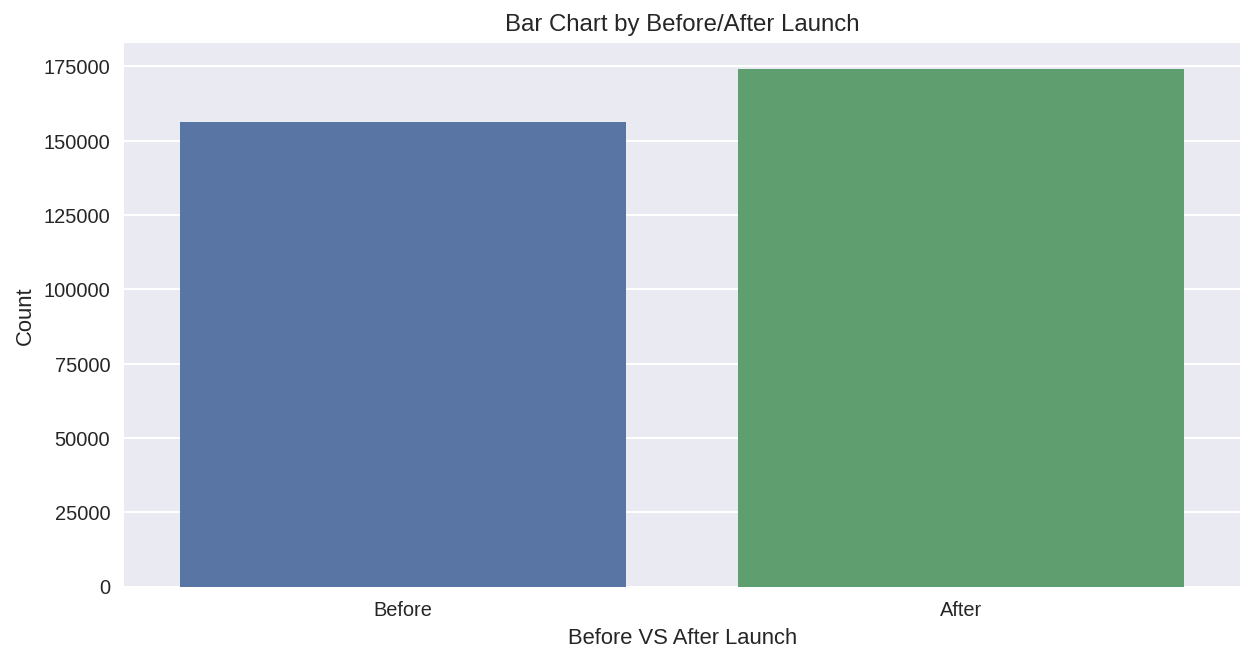

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df["After"])
plt.title('Bar Chart by Before/After Launch')
plt.xlabel('Before VS After Launch')
plt.xticks([0, 1], ['Before', 'After'])
plt.ylabel('Count')

## 2.5 Handle Null Values

THe main focus is "Sound Bite Text" for natural language processing. But as mentioned, there is no null value in that column, so we do not have to further proces this.

In [ ]:
df[df["Sound Bite Text"].isnull()]

,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Media Type,URL,Domain,Published Date (GMT-04:00) New York,...,Post Likes,Post Shares,Post Views,Post Dislikes,Product Name,Product Hierarchy,Rating,Phone_Type,Published Date,After


## 2.6 Pre-processing Text Data

In this section, we will clean the original text data by removing the stop words and retaining words with characters between 3 and 13 with the help of spaCy library and TweetTokenizer. It will return the string representation of clean text for every observation. At this stage, we do not tokenize the text yet as we want to preserve a general format for attribute analysis and sentiment analysis.

For sentiment analysis, we will be parsing the entire string representation into the model to preserve the contextual meaning of the text data.

For attribute analysis, we will only be tokenizing the sentence there against a specific and personalized set of stopwords.

In [ ]:
# instantiate spacy with "en_core_web_sm"
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Creat function to tokenize and Remove stop words 
def tokenize_stop(df):
  tweets = df['Sound Bite Text'].to_numpy()
  

  # tokenize tweets with NTLK's TweetTokenizer 
  cleaned_tweets = []
  t_tokenizer = TweetTokenizer()
  
  for tw in tqdm(tweets):
      cleaned = [word for word in t_tokenizer.tokenize(tw.lower()) if (word not in nlp.Defaults.stop_words) and len(word) > 2 and len(word) < 14]
      cleaned_tweets.append(' '.join(cleaned))

  return cleaned_tweets



In [ ]:
#Tokenize and Remove stop words
clean_df = tokenize_stop(df)

100%|██████████| 330447/330447 [01:51<00:00, 2950.77it/s] 


# **Step 3: Demographic Analysis**

## 3.1 Overview of Demographics

To explore the dataset and analyze demographic features, we first overview the data.

In [ ]:
# Create dataframe df_demo with the demographic columns we want to investigate
analysis_col = ['Post ID', 'Sound Bite Text', 'Title', 'Source Type', 'Post Type', 'Published Date (GMT-04:00) New York', 'Author Gender','Author Location - Country 1']
df_demo = df[analysis_col]
df_demo.rename(columns = {'Published Date (GMT-04:00) New York':'Published Date', 'Author Location - Country 1':'Author Country'}, inplace = True)
df_demo.head()

,Post ID,Sound Bite Text,Title,Source Type,Post Type,Published Date,Author Gender,Author Country
3,post_159006163596_188342999,"Samsung's Galaxy S8 phone aims to dispel the Note 7 debacle Technology Samsung’s Galaxy S8 phone aims to dispel the Note 7 debacle Samsung seems to be playing it safe —at least with its battery — as it unveils its first major smartphone since the embarrassing recall of its fire-prone Note 7. The Galaxy S8 will come in two sizes, both bigger than comparable models from last year. To maximize display space, there’s no more physical home button. That’s a big bet that its phones will justify a higher price, whereas it could have used these new phones as a way to drive higher sales after a couple of years of stagnation.",Samsung's Galaxy S8 phone aims to dispel the Note 7 debacle,Tumblr,Original,"Mar 30, 2017 1:14:39 PM",Unknown,NaN
5,post_159006076800_1185428,"Microsoft Has Its Own Special Editions of the Samsung Galaxy S8 & S8+ Microsoft apps have long been a staple of Samsung’s smartphones, but now the two tech giants are going one step further by launching a special “Microsoft Edition” of the newly unveiled Galaxy S8 and S8+. Featuring all the same tech specs, the exclusive smartphones add the likes of Outlook to the usual suite of Office apps and OneDrive. Oddly enough, however, the phones also utilize Microsoft’s Cortana virtual assistant – this despite the fact that the Galaxy S8/S8+ launch is supposed to be the big rollout for Samsung’s own highly touted (and potentially superior) Bixby. Nonetheless, the special editions of the smartphones are reportedly available to pre-order now exclusively at Microsoft’s own flagship stores. Click here to view full gallery at Hypebeast.com",Microsoft Has Its Own Special Editions of the Samsung Galaxy S8 & S8+,Tumblr,Original,"Mar 30, 2017 1:11:26 PM",Unknown,NaN
6,553f1ee37f.558944,"Hello Malaysia MIUI-Ers ! Samsung and Microsoft are taking their relationship to the following level with an uncommon Samsung Galaxy S8 Microsoft Edition that might be accessible online at Microsoft's webstore. While the standard S8 as of now comes pre-stacked with Microsoft's Office applications, the redid form additionally includes Cortana (Microsoft's AI associate), Excel, Outlook, OneDrive, One Note, Bing, Groove, Skype, MSN News and the sky is the limit from there. The custom software will be consequently downloaded through the first run via the smartphone with Wi-Fi. In contrast, both the S8 and S8+ will be accessible in Microsoft Editions. “A Microsoft customization is applied to the Samsung Galaxy S8 and Galaxy S8+ Microsoft Edition when the devices are unboxed and connected to Wi-Fi,” says a Microsoft spokesperson. “This customization ensures customers a best-in-class productivity experience with Microsoft applications such as Office, OneDrive, Cortana, Outlook and more.” To conclude, there is no official announcement yet on whether the S8 and S8+ Microsoft Edition will be accessible from the Microsoft store.",NaN,Forums,Original,"Mar 31, 2017 11:39:00 AM",Male,China
9,http://www.ibtimes.com/vr-vs-ar-disney-not-fans-virtual-reality-will-focus-augmented-reality-parks-2514847.1,"Basic headsets like the Samsung Gear and Google Daydream are popular thanks to their low cost and accessibility, but offer limited interactivity. At the same time, more advanced headsets like the HTC Vive and Oculus Rift require pricey hardware and currently require you to be tethered to a home desktop. Read: Apple’s Tim Cook Endorses Augmented Reality, Which May Appear In iPhone 8 While AR’s gaming and interactive applications are in their relative infancy, Iger isn’t the only high-profile supporter of the platform. Apple CEO Tim Cook has been a fan of the tech, describing VR as technology that “closes out the world,” and AR is speculated to be a potential feature on the upcoming iPhone 8. Related Stories","VR Vs. AR: Disney Not Fans Of Virtual Reality, Will Focus On Augmented Reality In Parks",Blogs,

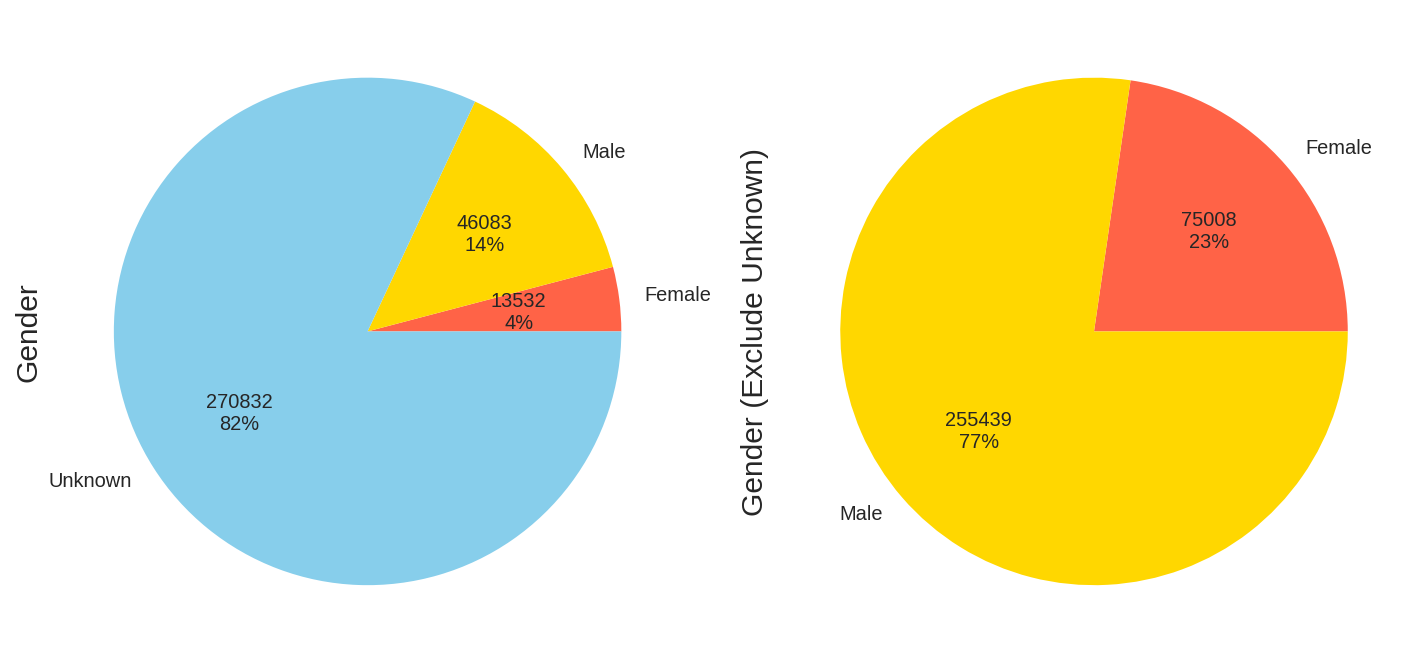

In [ ]:
# Pie Chart of Gender
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

df_demo.groupby('Author Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, colors=['tomato', 'gold', 'skyblue'], ax=ax1)
df_demo.loc[df_demo['Author Gender'] != 'Unknown'].groupby('Author Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, colors=['tomato', 'gold'], ax=ax2)

ax1.set_ylabel('Gender', size=15)
ax2.set_ylabel('Gender (Exclude Unknown)', size=15)
plt.tight_layout()
plt.show()

After excluding the unknowns in gender column, we can find out that the majority text data are composed by male users.

Text(0, 0.5, 'Post Type')

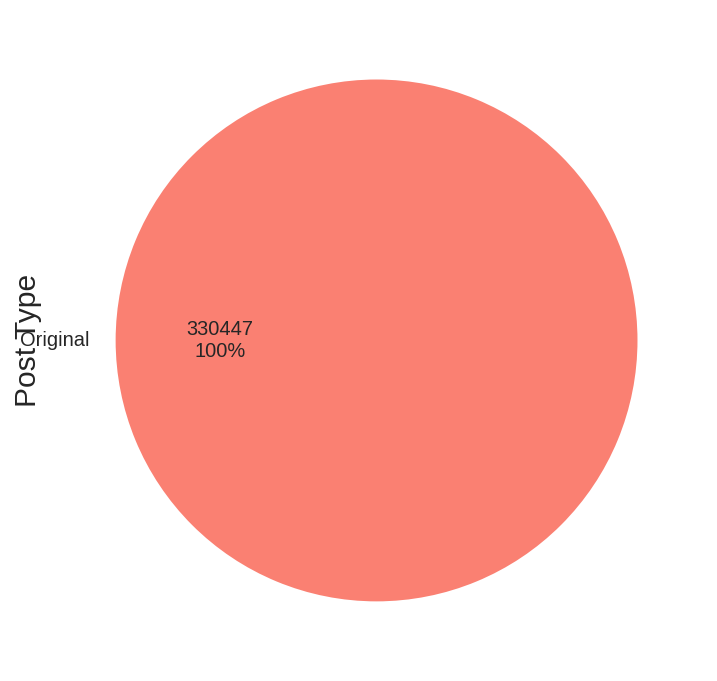

In [ ]:
# Pie chart of Post Type
fig = plt.figure(figsize=(8, 6))

df_demo.groupby('Post Type').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, colors=['salmon', 'mediumseagreen', 'lightsteelblue'])
plt.ylabel('Post Type', size=15)

Most of the posts are orginial and only small portion of them are comments, replies or retweets. 

Text(0, 0.5, 'Source Types')

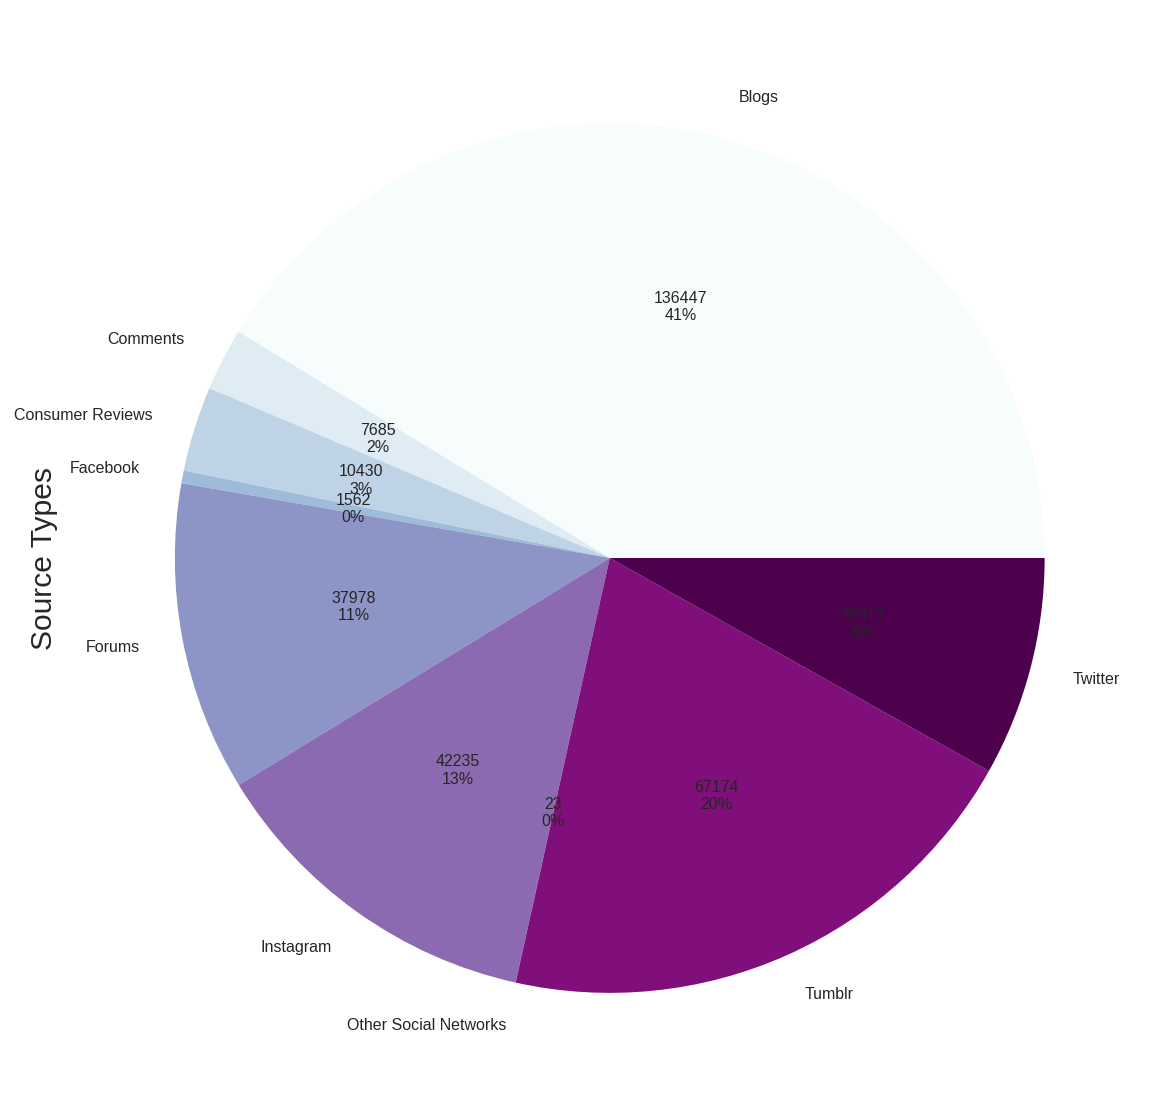

In [ ]:
# Pie char of Source Type
fig = plt.figure(figsize=(15, 10))

df_demo.groupby('Source Type').size().plot(kind='pie', autopct=label_function, cmap ="BuPu" , textprops={'fontsize': 8})
plt.ylabel('Source Types', size=15)

The majority source types are Blogs, Forum and Tumblr, which is surprising to us, because we expect that Instagram, Twitter or Facebook will have large amount of discussion about Apple, Samsung and their products as well.

## 3.2 Compare US v.s Non-US

We are specifically curious about whether there are any difference between the US market and Non-US markets. Therefore, we conduct different analysis comparing these two groups.

Text(0, 0.5, 'Countries')

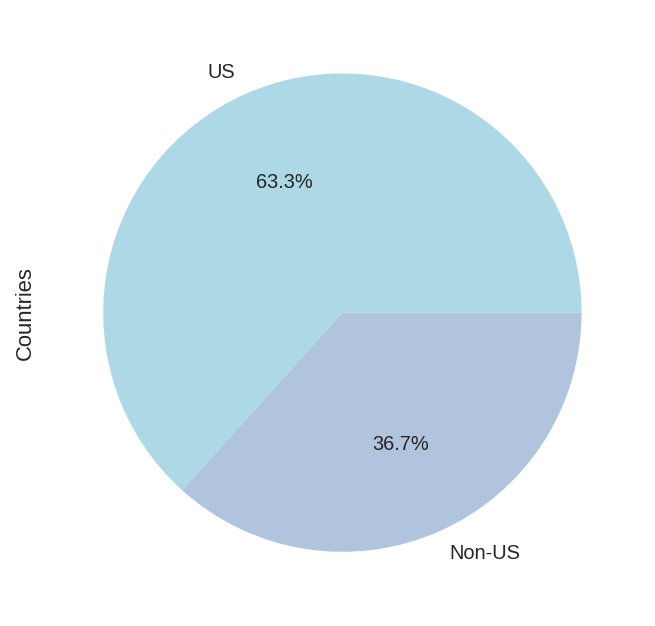

In [ ]:
countries = df_demo[~df_demo['Author Country'].isna()]

us_perc = len(countries[countries['Author Country'] == "United States"]) / len(countries)
non_us_perc = len(countries[countries['Author Country'] != "United States"]) / len(countries)

value = [us_perc, non_us_perc]
labels = ['US', 'Non-US']
plt.pie(value, labels = labels, autopct='%1.1f%%', colors = ['lightblue','lightsteelblue'])
plt.ylabel("Countries")

In [ ]:
social_media = df_demo[~((df_demo['Source Type'] == 'Blogs') | (df_demo['Source Type'] == 'Comments') | (df_demo['Source Type'] == 'Consumer Reviews') | (df_demo['Source Type'] == 'Other Social Networks') | (df_demo['Source Type'] == 1))]
social_media = social_media[~social_media['Author Country'].isna()]

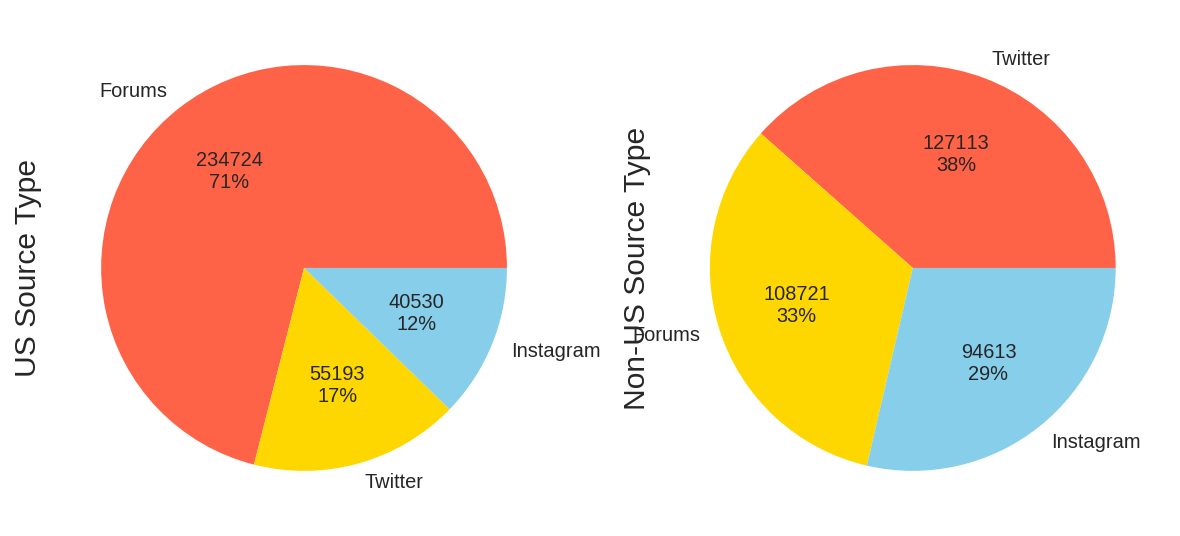

In [ ]:
# Compare "Source Type" between US and Non-US countries
US_social = social_media[social_media['Author Country'] == "United States"]['Source Type'].value_counts()
Non_US_social = social_media[social_media['Author Country'] != "United States"]['Source Type'].value_counts()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

US_social.plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, colors=['tomato', 'gold', 'skyblue'], ax = ax1)
Non_US_social.plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, colors=['tomato', 'gold', 'skyblue'], ax = ax2)

ax1.set_ylabel('US Source Type', size=15)
ax2.set_ylabel('Non-US Source Type', size=15)

plt.show()

It seems that most of posts on the abovementioned platforms like Facebook, Tumblr, are from users who are not labeled where they locate, so we will be focusing on these three platforms. We can find out that there are more non-US posts from Twitter and Instagram comparing to the US posts.

To know whether people from different country will have different preferences in terms of social media platforms to discuss about products, we segment the posts by locations(US and Non-US)


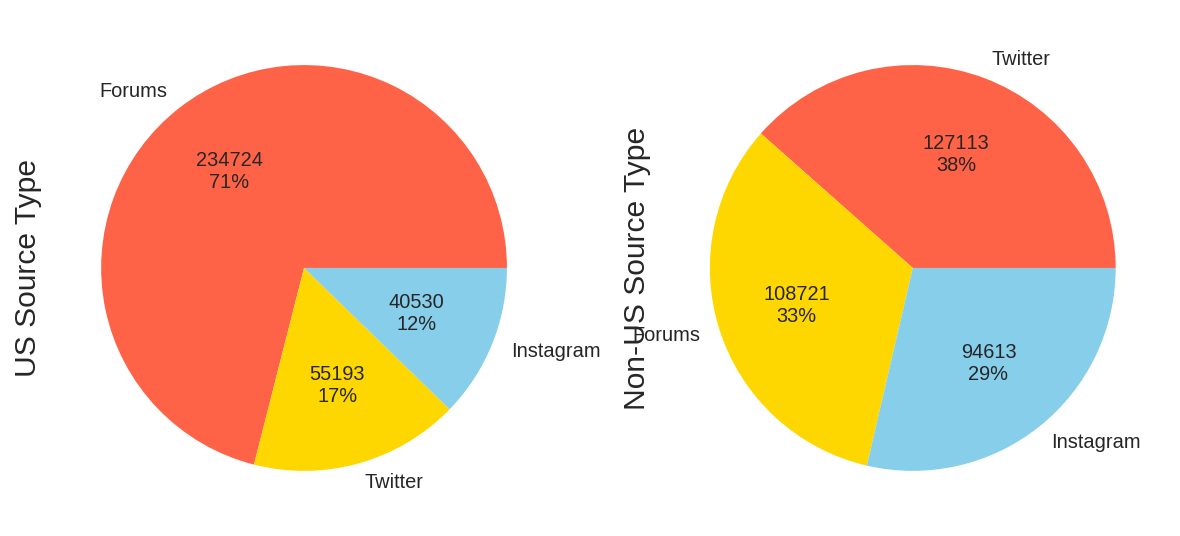

In [ ]:
US_social = social_media[social_media['Author Country'] == "United States"]['Source Type'].value_counts()
Non_US_social = social_media[social_media['Author Country'] != "United States"]['Source Type'].value_counts()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

US_social.plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, colors=['tomato', 'gold', 'skyblue'], ax = ax1)
Non_US_social.plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, colors=['tomato', 'gold', 'skyblue'], ax = ax2)

ax1.set_ylabel('US Source Type', size=15)
ax2.set_ylabel('Non-US Source Type', size=15)
plt.show()

To further investigate the volume of disucssion in US and Non-US region, we calculated the term frequency of iPhone keywords and Samsung keywords mentioned in these three platforms.

In [ ]:
iphone = ['iphone', 'iPhone', 'i8', 'iPhone 8', 'iPhone8', 'iphonex', 'iphone x', 'iphone 10', 'iphone10']
samsung =  ['s8', 'S8', 'Galaxy', 'galaxy']

df_us_social = social_media[social_media['Author Country'] == "United States"]
df_non_us_social = social_media[social_media['Author Country'] != "United States"]

def CountWfInGroup(df):
    iphone_counter = Counter()
    samsung_counter = Counter()

    for kw in iphone:
      for text in df['Sound Bite Text']:
          if kw in text:
            iphone_counter.update({kw:1})
    
    for kw in samsung:
      for text in df['Sound Bite Text']:
          if kw in text:
            samsung_counter.update({kw:1})
    return iphone_counter, samsung_counter


In [ ]:
us_iphone, us_samsung = CountWfInGroup(df_us_social)
non_us_iphone, non_us_samsung = CountWfInGroup(df_non_us_social)

iphone_count = [sum(us_iphone.values()), sum(non_us_iphone.values())]
samsung_count = [sum(us_samsung.values()), sum(non_us_samsung.values())]

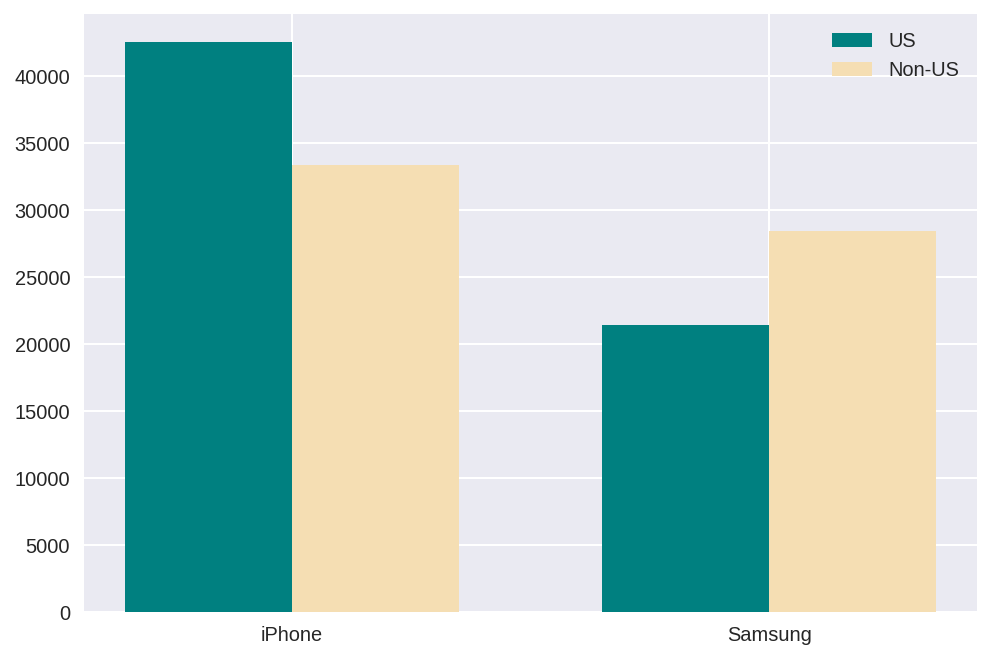

In [ ]:
fig, ax = plt.subplots()
bar_width = 0.35
ind = np.arange(2)

ax.bar(ind, iphone_count, bar_width, label="US", color = 'teal')

ax.bar(ind + bar_width, samsung_count, bar_width, label="Non-US", color = 'wheat')

ax.set_xticks(ind+ bar_width/2)
ax.set_xticklabels(["iPhone", "Samsung"])
ax.legend()

plt.show()

We discovered that people in the US discussing about iPhone more often than Samsung, however, in Non-US countries, Samsung has higher discussion volume than iPhone in 2017. Since higher social media volume is associated with brand recognition, we would suggest that Apple's marketing strategies towards the overseas market can use social media listening to keep up with the treding topics and create opportunities for their customers to share their thoughts about the product on social media.

# **Step 4: Sentiment Analysis**

In this section, we will be conducting sentiment analysis on the text data. We aim to find out the respective sentiments for iPhone and Samsung before and after the launch, as well as the overall sentiments. To do so, we utilize a Sentiment Intensity Analyzer and create a function to get the compound polarity scores for the sentences in *Sound Bite Text*.

## 4.1 Overall Sentiment

In [ ]:
# Compute SentimentScore function
# This will take around 3 minutes
sia = SentimentIntensityAnalyzer()

def GetSentimentScore(text): 
    sentences = tokenize.sent_tokenize(text) 
    for s in sentences:
        return sia.polarity_scores(s)['compound']
    
# Add SentimentScore Column
scores = [GetSentimentScore(df["Sound Bite Text"][i]) for i in df["Sound Bite Text"].index]
df["Sentiment_Score"] = scores

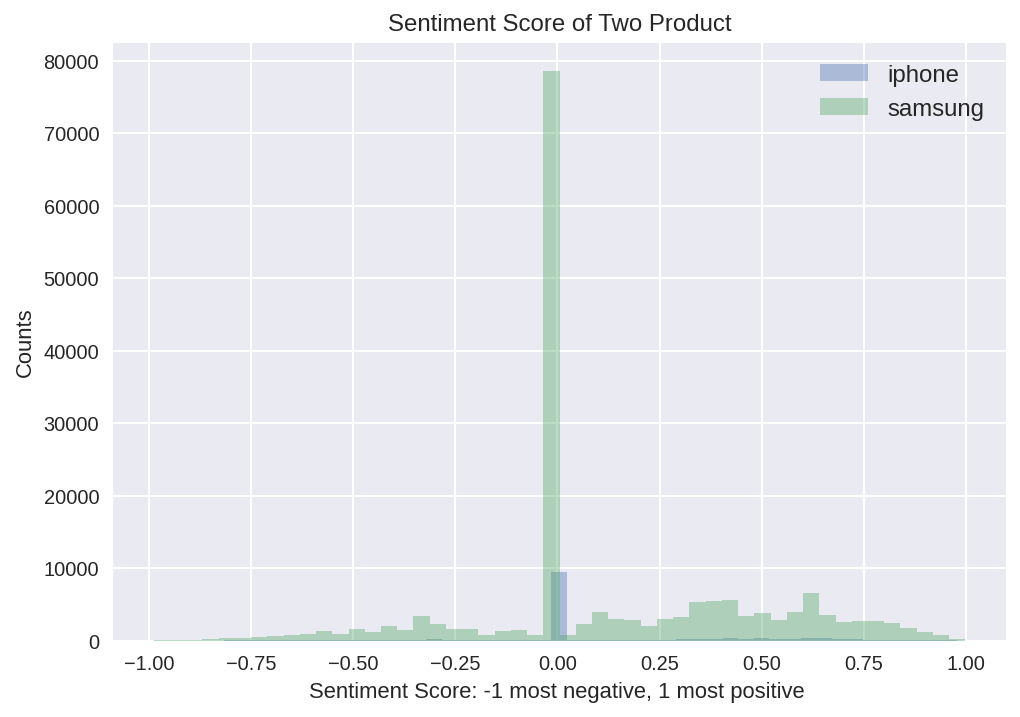

In [ ]:
iphone_score = df[(df["Phone_Type"] == 1) ]["Sentiment_Score"]
s8_score = df[(df["Phone_Type"] == 2) ]["Sentiment_Score"]
plt_title = 'Sentiment Score of Two Product'

def sentiment_histogram(iphone_score, s8_score, plt_title):
        sns.distplot(iphone_score,  kde = False, label='iphone')
        sns.distplot(s8_score,  kde = False,label='samsung')
        # Plot formatting
        plt.legend(prop={'size': 12})
        plt.title(plt_title)
        plt.xlabel('Sentiment Score: -1 most negative, 1 most positive ')
        plt.ylabel('Counts')

sentiment_histogram(iphone_score, s8_score, plt_title)

The above plot is the sentiment score for the whole period of time for the two products. Since there are many neutral text, we would hide the neutral counts to focus on the comparison between positive and negative text for these two products.

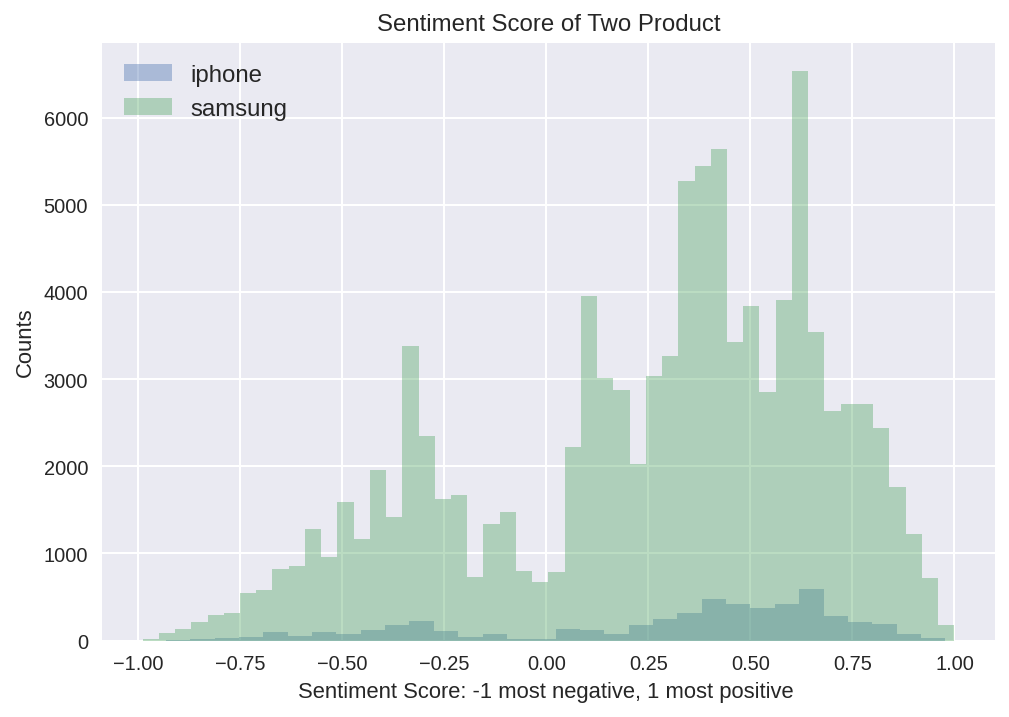

In [ ]:
iphone_score = df[(df["Phone_Type"] == 1) & (df["Sentiment_Score"] != 0.0)]["Sentiment_Score"]
s8_score = df[(df["Phone_Type"] == 2) & (df["Sentiment_Score"] != 0.0)]["Sentiment_Score"]
plt_title = 'Sentiment Score of Two Product'
sentiment_histogram(iphone_score, s8_score, plt_title)

The above plot is the sentiment score for the whole period of time for the two products. In general, comments are mostly neutral to positive. Besides, Samsung has a slightly higher positive sentiment score from the Sound Bite Text.

## 4.2 Sentiment Before VS After Launch

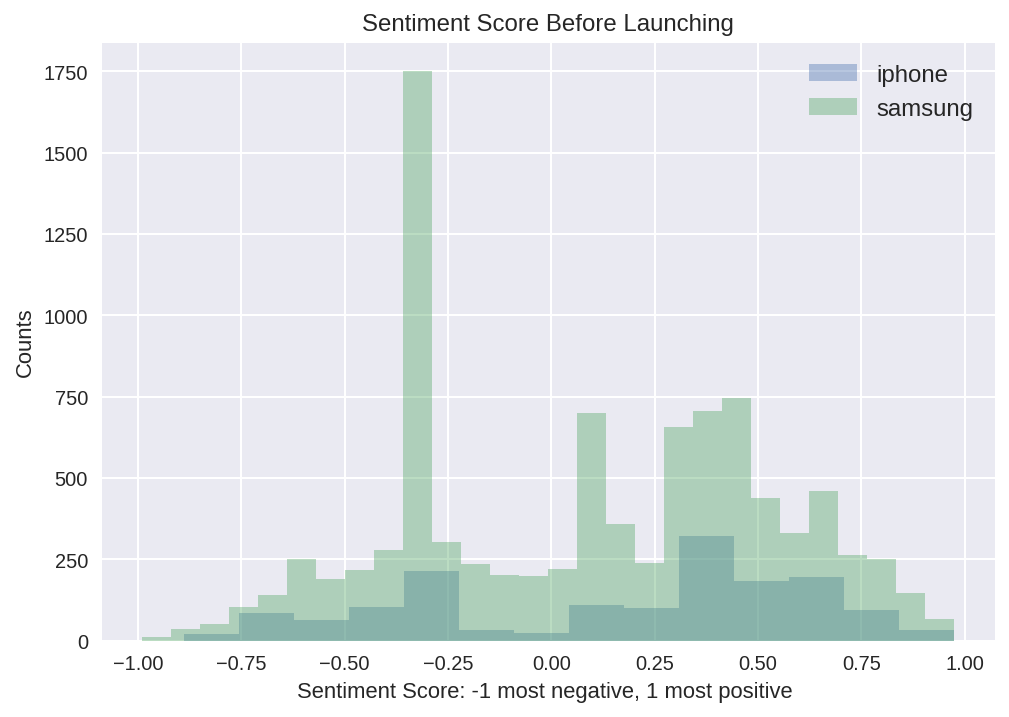

In [ ]:
iphone_score = df[(df["Phone_Type"] == 1) & (df["Sentiment_Score"] != 0.0) & (df["After"] == 0)]["Sentiment_Score"]
s8_score = df[(df["Phone_Type"] == 2) & (df["Sentiment_Score"] != 0.0) & (df["After"] == 0)]["Sentiment_Score"]
plt_title = 'Sentiment Score Before Launching'

sentiment_histogram(iphone_score, s8_score, plt_title)

The above plot is the sentiment score before the launch of the two products. Samsung has a higher volume of posts than iPhone, and a higher proportion of positive text compared to negative text. iPhone has lesser posts and similar proportion of positive to negative text.

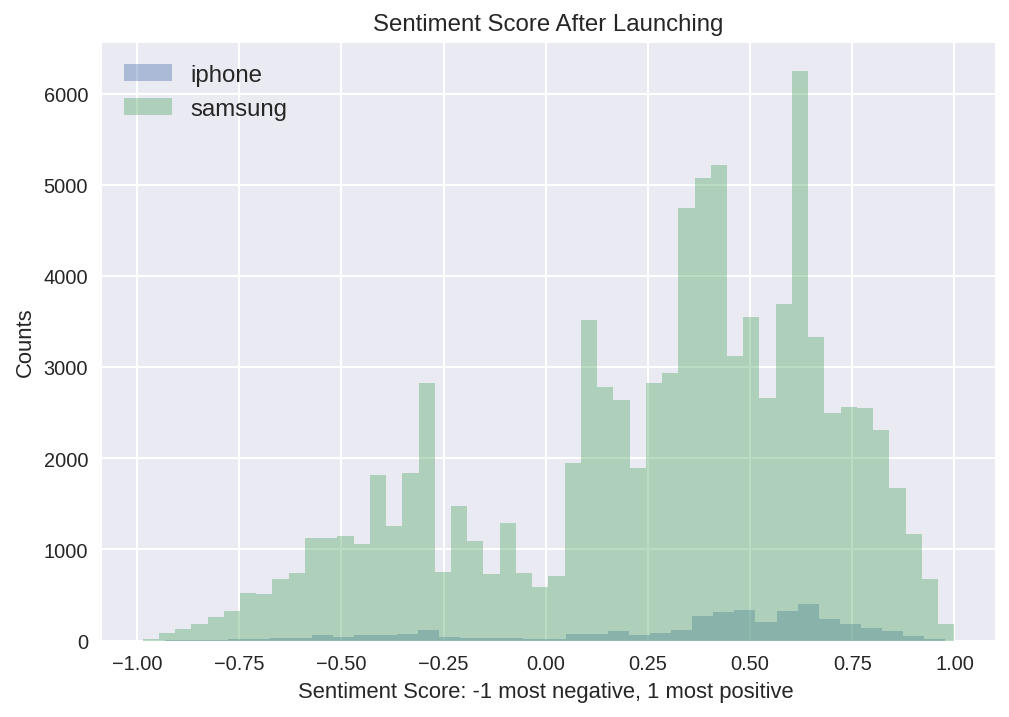

In [ ]:
iphone_score = df[(df["Phone_Type"] == 1) & (df["Sentiment_Score"] != 0.0) & (df["After"] == 1)]["Sentiment_Score"]
s8_score = df[(df["Phone_Type"] == 2) & (df["Sentiment_Score"] != 0.0) & (df["After"] == 1)]["Sentiment_Score"]
plt_title = 'Sentiment Score After Launching'

sentiment_histogram(iphone_score, s8_score, plt_title)

The above plot is the sentiment score after launching the two products. iPhone has a far lesser volume of posts than Samsung, but still has more positive text compared to negative text. Samsung has more posts and more amounts of positive than negative text.

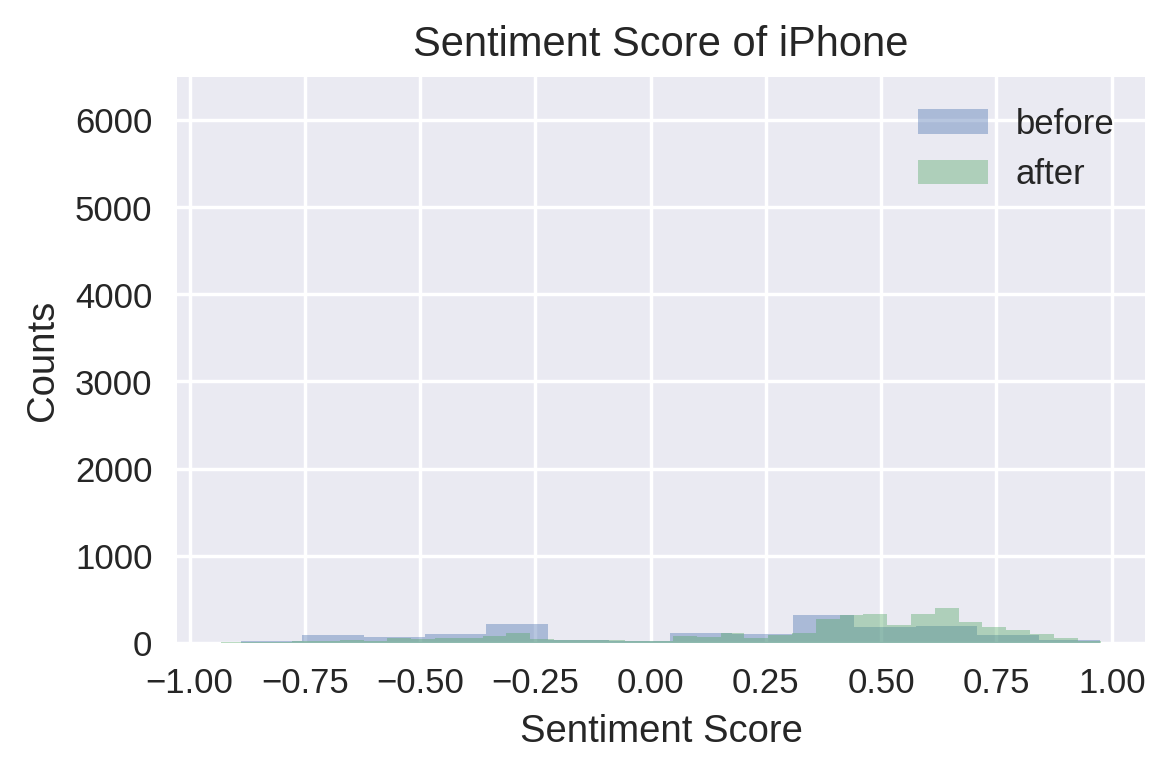

In [ ]:
iphone_before_score = df[(df["Phone_Type"] == 1) & (df["Sentiment_Score"] != 0.0) & (df["After"] == 0)]["Sentiment_Score"]
iphone_after_score = df[(df["Phone_Type"] == 1) & (df["Sentiment_Score"] != 0.0) & (df["After"] == 1)]["Sentiment_Score"]
plt_title = 'Sentiment Score of iPhone'

def sentiment_histogram2(phone_before, phone_after, plt_title):
    fig, ax = plt.subplots(figsize=(5,3), dpi=125)
    ax.set_ylim([0, 6500])

    sns.distplot(phone_before,  kde = False, label='before')
    sns.distplot(phone_after,  kde = False,label='after')
    # Plot formatting
    plt.legend(prop={'size': 10})
    plt.title(plt_title)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Counts')

sentiment_histogram2(iphone_before_score, iphone_after_score, plt_title)

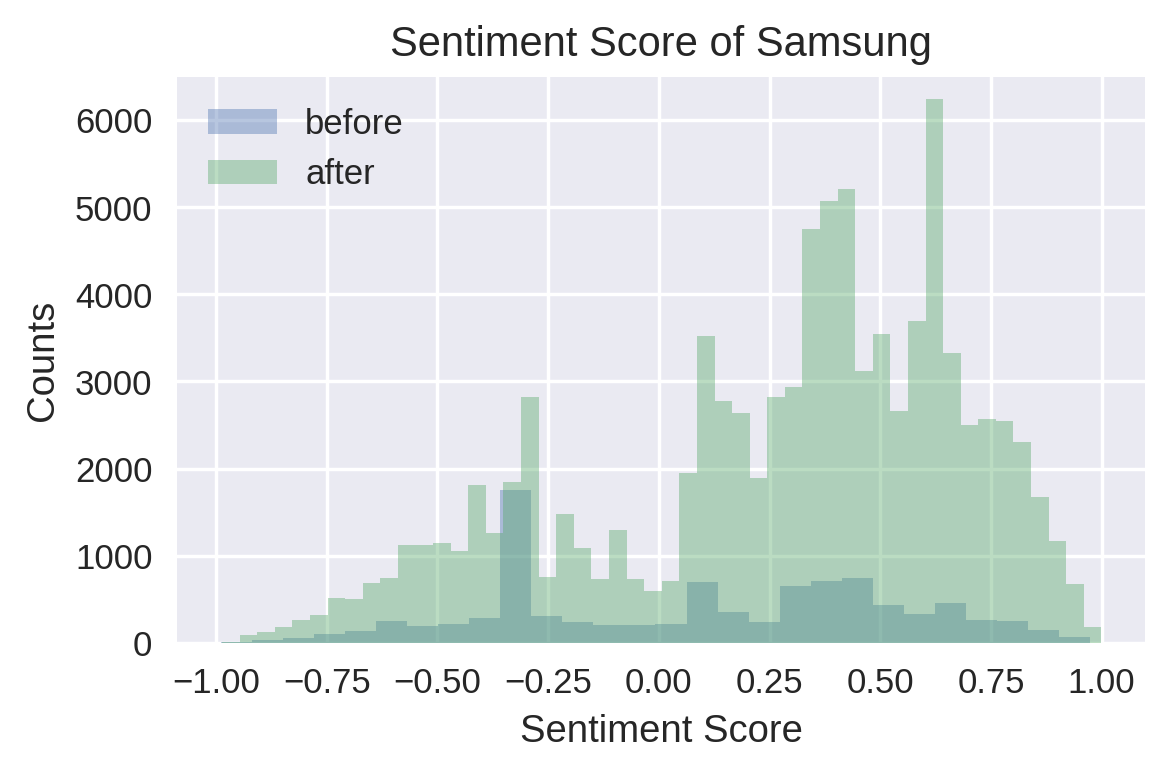

In [ ]:
s8_before_score = df[(df["Phone_Type"] == 2) & (df["Sentiment_Score"] != 0.0) & (df["After"] == 0)]["Sentiment_Score"]
s8_after_score = df[(df["Phone_Type"] == 2) & (df["Sentiment_Score"] != 0.0) & (df["After"] == 1)]["Sentiment_Score"]
plt_title = 'Sentiment Score of Samsung'

sentiment_histogram2(s8_before_score, s8_after_score, plt_title)

When comparing the before and after launch sentiment scores of the two respective phones, we found that Samsung's scores increased significantly after the launch with a higher number of posts while iPhones maintained similar levels after the launch.

We are thus interested to find out how and why Samsung is able to generate the amount of buzz that it did. In the following step, we wil look more into the product attributes to hopefully find a link to this occurrence.

# **Step 5: Attribute Analysis**

We will firstly conduct topic modelling to find out the most important attributes customers care about for both iPhone and Samsung. For these topics, we will further investigate using POS to figure out what customers think about the attributes. We will then perform further market research based on the attributes that the customers mention. Furthermore, we will do text sentiment analysis for posts involving those attributes.

In [ ]:
#Extract data based on phone type and the data with only a single type's content
iphone = df[(df["Phone_Type"] == 1)]
s8 = df[(df["Phone_Type"] == 2)]

In [ ]:
# Instantiate a spacy object
nlp = spacy.load("en_core_web_sm")
irrelevant_words_for_attribute = ['iphone','apple', 'samsung','8','X', 'S8','#', '-', 'galaxy',\
                    'plus','phone', "'s", '...', '.', 'android', 'smartphone', 'note', \
                    'phones', 'device', '2017', 'mobile',"n't", 'pre',\
                    'available', 'feature', 'previous', '-pron-', \
                    'new', 'be', 'year', 'iphones','user', 'company',\
                    'report', 'news', 'rumor', 'post', 'author', 'location', 'type', 'iphone8', 
                    'iphone10', 'iphonex', 'iphone8plus', 'iphone7', 'iphone7plus', '000', 'http', 'https',
                    'www', 'com', 'appleiphone', 'link', 'bio', 'tags', 'today', 'event', 'galaxys8', 'samsunggalaxys8',
                    'samsunggalaxy', 'tt', 'ift', 'ifttt']
                    
                    #'analyst', 'customers', 'handle', 'product', 'city',
                   # 'hierarchy', 'comments', 'interests', 'title', 'handle', 'domain', 'dislikes', 'shares'

stop_words = nlp.Defaults.stop_words.union(irrelevant_words_for_attribute)

## 5.1 Topic Modelling

In order to identify what most customers are concerned about, we performed topic modelling on the Sound Bite Text. This will cluster and return the top words per topic and their probabilities within the topic. From this result, we can then interpret certain attributes that the consumers are interested in and do further market research on them.

In [ ]:
def topicModeling(df, num, top):
    tf_vectorizer = CountVectorizer(max_df=0.95, stop_words = stop_words)
    tf = tf_vectorizer.fit_transform(df["Sound Bite Text"])
    lda = LatentDirichletAllocation(n_components=num, random_state=0)
    lda.fit(tf)
    
    topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
    vocab = tf_vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % top)
    print()
    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(top):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':', topic_word_distributions[topic_idx, word_idx])
        print()

In [ ]:
topicModeling(iphone, 10, 10)

Displaying the top 10 words per topic and their probabilities within the topic...

[Topic 0]
like4like : 0.012813952267137508
instagood : 0.010199779466365428
follow : 0.009487421648182764
love : 0.009057161222772479
followme : 0.007806235538045829
followforfollow : 0.007191588455817689
likeforlike : 0.0071433464483524655
follow4follow : 0.006460457624989979
instadaily : 0.00619003032222721
photooftheday : 0.006110006381707308

[Topic 1]
case : 0.0226200869291632
cases : 0.01572736093225975
iphonecase : 0.008750748534254164
co : 0.006556377776304217
order : 0.006248949097189367
iphone8case : 0.006118154034520843
newiphone : 0.005725227517522909
twitter : 0.0054285755437343455
design : 0.005280315162371163
phonecase : 0.00513226062819021

[Topic 2]
twitter : 0.009245169412217731
battery : 0.007522125744173065
design : 0.0074890221120378206
display : 0.006737441794268769
camera : 0.006097521806159187
pic : 0.00570907193449871
touch : 0.005507535834824857
like : 0.0054103508002758
geskin 

Since everytime generating the topics, we may get different results. Here are some overall general interesting attributes for iPhone.

*   Cluster 1: cases, outlook
*   Cluster 2: colours, storage
*   Cluster 3: camera/ photograpahy
*   Cluster 4: battery

For our iPhones, we can see that most of the attributes are familiar attributes that have consistently been sought after by our customers.

An interesting thing to note is that the attributes that show up are due to changes in the iPhone 8 and iPhone 10. For example, cases might be due to the increase in iphone screen size, and colours would be due to the release of new Gold color. As for camera, iPhone 10 was the first iPhone with 2 back cameras, creating buzz. Lastly, for battery, it could be due to the first time iPhone 8 and X was released with wireless charging capabilities.

For reference, please refer to:
*   [Gold Color](https://www.apple.com/newsroom/2017/09/iphone-8-and-iphone-8-plus-a-new-generation-of-iphone/)
*   [Camera, Wireless Charging](https://www.apple.com/newsroom/2017/09/the-future-is-here-iphone-x/)

In [ ]:
topicModeling(s8, 10, 10)

Displaying the top 10 words per topic and their probabilities within the topic...

[Topic 0]
microsoft : 0.009045098428547255
irrelevant : 0.007322326977951252
flag : 0.007267308718895047
10 : 0.006607535336869779
active : 0.006312752201482401
leaked : 0.006212971130169652
tech : 0.006191327808751652
leaks : 0.006133687200123736
leak : 0.00585537876871075
pinterest : 0.0055618925049096945

[Topic 1]
display : 0.021516937240642065
camera : 0.014494725679775375
ram : 0.010323426181047897
inch : 0.010254480795623272
dual : 0.009651004523454377
storage : 0.0071584559540640615
sensor : 0.0071231314051667
screen : 0.00696638184473923
fingerprint : 0.0069387043581876275
price : 0.006503264871106068

[Topic 2]
camera : 0.01989467568324648
video : 0.006432319921634147
experience : 0.0059966105988051525
app : 0.005402514736725529
mode : 0.0053008898028578015
users : 0.005228399743224559
photos : 0.005110108272896088
display : 0.00506460034626809
features : 0.0049191840741520335
devices : 0.00480

Since everytime generating the topics, we may get different results. Here are some overall general interesting attributes for Samsung.

*   Cluster 1: competitors
*   Cluster 2: bixby voice assistant and snapdragon 835
*   Cluster 3: iris scanning
*   Cluster 4: screen (due to Infinity Display)
*   Cluster 5: protection, cases
*   Cluster 6: operating systems
*   Cluster 7: leaking news in 2017 about the launch

Key Takeaway: An interesting thing that we observed is that Samsung actually made a great breakthrough in 2017 with regard to its phone's newest features: bixby voice assistant, snapdragon 835, infinity edge, and some external factors including leaked news regarding 2017 launch. All these could possibly explain the reason for increased buzz after the launch.

For reference, please refer to:
*   [Bixby](https://www.pocket-lint.com/phones/news/samsung/140128-what-is-bixby-samsungs-assistant-explained-and-how-to-use-it)
*   [Snapdragon 835](https://www.forbes.com/sites/ryanwhitwam/2017/03/29/official-galaxy-s8-specs-confirm-this-is-the-first-snapdragon-835-phone/?sh=b8c5232200ab)
*   [Iris Scanning](https://www.samsung.com/global/galaxy/what-is/iris-scanning/)
*   [Infinity Display](https://www.samsung.com/global/galaxy/what-is/infinity-display/#:~:text=The%20Infinity%20Display%20is%20the,one%20edge%20to%20the%20other.)

*   [2017 Leaked News](https://www.forbes.com/sites/gordonkelly/2017/03/12/samsung-galaxy-s8-galaxy-s8-plus-specifications-features-changes/?sh=3664d6e3237b)

As a result, we came up with an hypothesis that the heat in social media buzz of Galaxy S8 could have been generated by the new features. And we would like to verify this in the following analysis.

## 5.2 POS Analysis

In [ ]:
#merge the stop words to a long string
longString = ''
for s in irrelevant_words_for_attribute:
  longString += s

#This method is responsible for POS analysis and return a counter of words and counts
def wordFrequency(df, type):
  simple_counter = Counter()
  adj_counter = Counter()
  noun_counter = Counter()
  verb_counter = Counter()
  for tweet in tqdm(df):
    for token in nlp(tweet):
      if str(token) not in longString:
        simple_counter.update([token.lemma＿])
        if token.pos_ == "ADJ":
            adj_counter.update([token.lemma＿])
        elif token.pos_ == "NOUN":
            noun_counter.update([token.lemma＿])
        elif token.pos_ == "VERB":
            verb_counter.update([token.lemma＿])
  return simple_counter, adj_counter, noun_counter, verb_counter

In [ ]:
#tokenize
clean_iphone = tokenize_stop(iphone)
clean_s8 = tokenize_stop(s8)

100%|██████████| 180231/180231 [01:07<00:00, 2661.48it/s] 


In [ ]:
#this will take about 4 min to run
#Count words by type for iphone
iphone_simple = wordFrequency(clean_iphone, 'simple')
iphone_adj = wordFrequency(clean_iphone, 'adj')
iphone_noun = wordFrequency(clean_iphone, 'noun')
iphone_verb = wordFrequency(clean_iphone, 'verb')

100%|██████████| 14825/14825 [03:31<00:00, 70.00it/s] 


In [ ]:
#this will take about 1 hour to run
#Count words by type for s8
s8_simple, s8_adj, s8_noun, s8_verb = wordFrequency(clean_s8)

  0%|          | 265/180231 [00:05<57:06, 52.52it/s]  


KeyboardInterrupt: ignored

In [ ]:
#Create method for printing wordCloud
from wordcloud import WordCloud
# Code refer to UDA course code
def plotcloud(word_dict, name):
  num_max_word_cloud_words = 100 #top 100 words
  wc = WordCloud(max_words=num_max_word_cloud_words)
  wc.generate_from_frequencies(word_dict)
  plt.figure()
  plt.imshow(wc, interpolation='bilinear')
  plt.title(name)

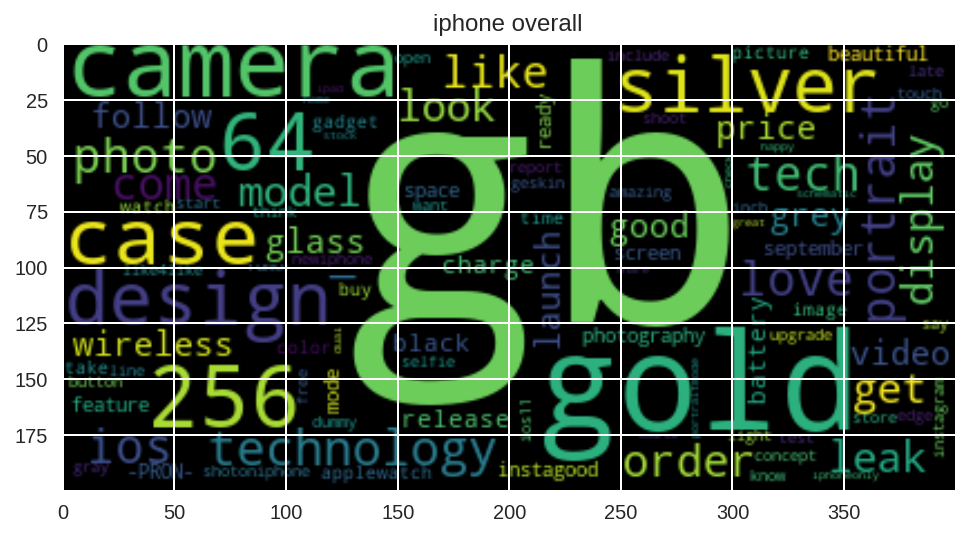

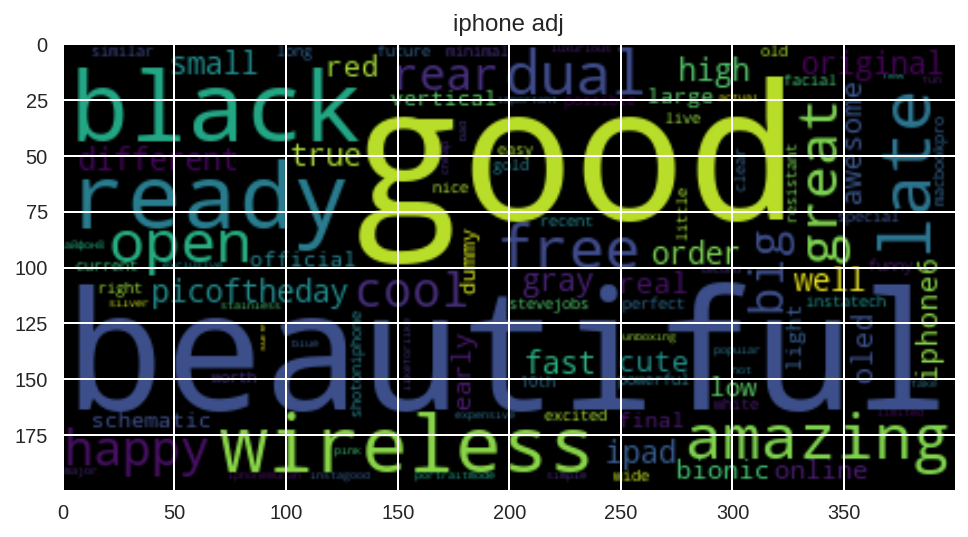

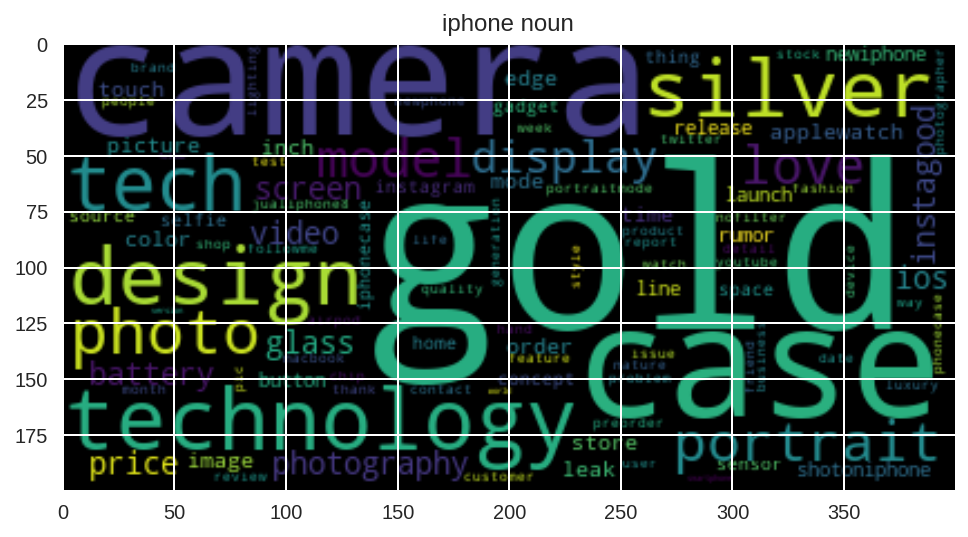

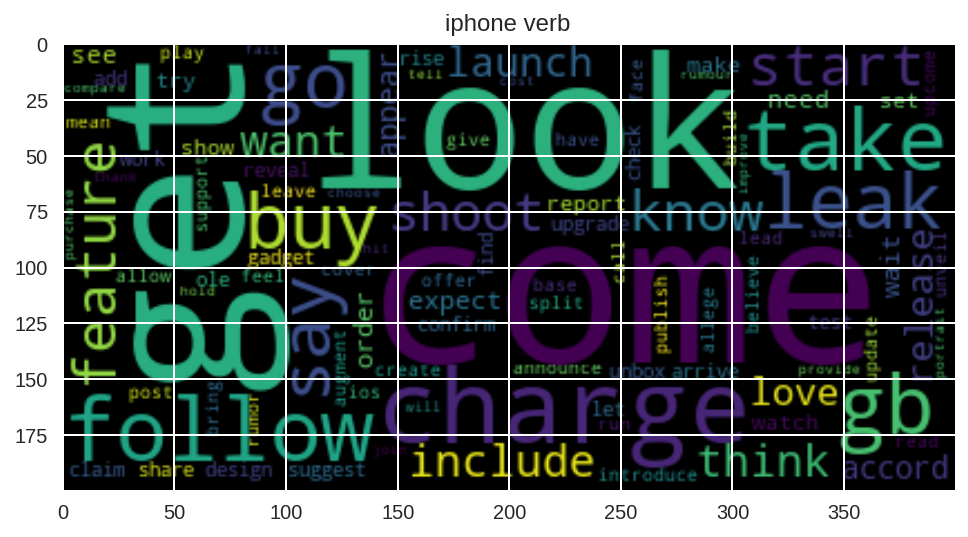

In [ ]:
#plot word cloud for iphone's attributes
plotcloud(iphone_simple, 'iphone overall')
plotcloud(iphone_adj, 'iphone adj')
plotcloud(iphone_noun, 'iphone noun')
plotcloud(iphone_verb, 'iphone verb')

Again, from the cloud graph above, we provide another angle to capture some key words that people talked about iphone 8/X.

**Noun words**: Camera, case, photography, photo, silver, design<br>
**Adj words**: beautiful good

We discovered that the words associated with iphones are more related to the photo taking feature, and the stylish, good-looking appearance of the product.

NameError: ignored

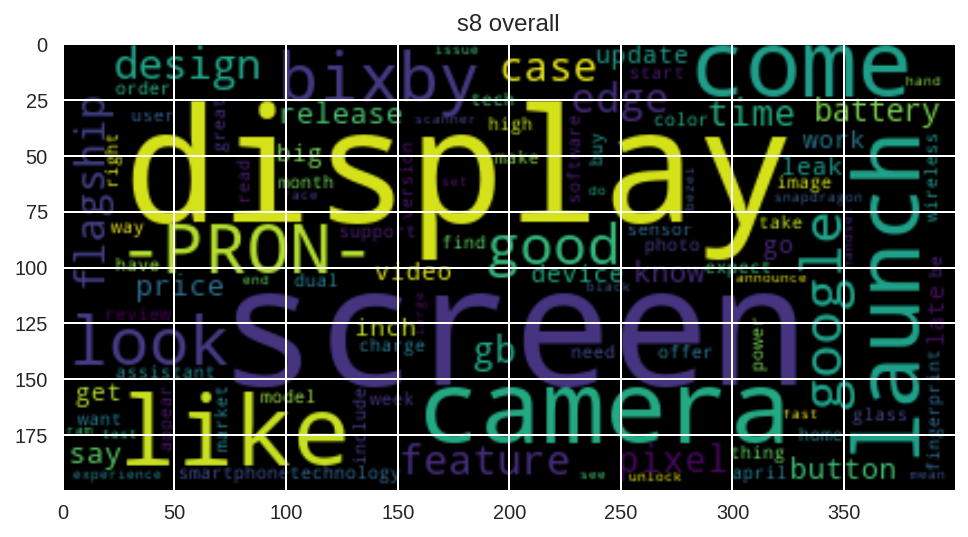

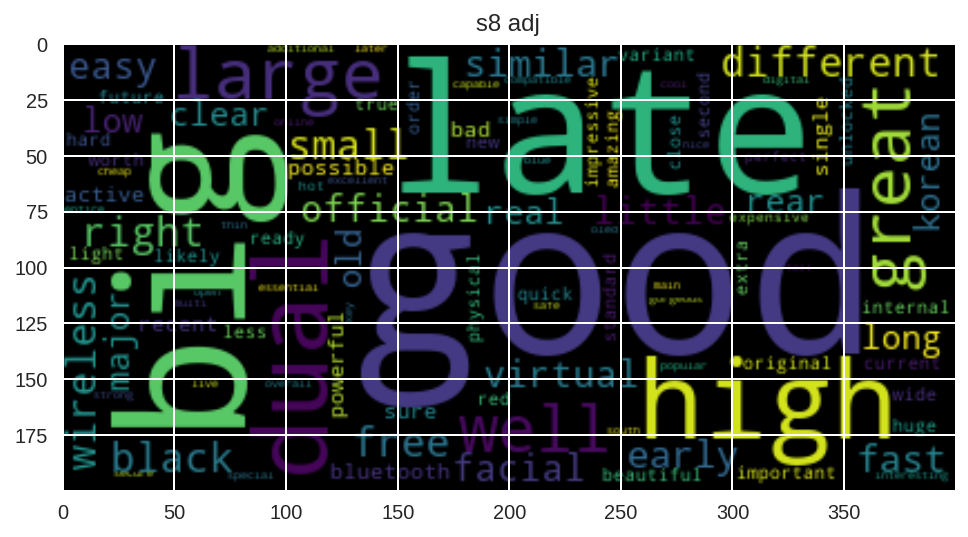

In [ ]:
#plot word cloud for s8's attributes
plotcloud(s8_simple, 's8 overall')
plotcloud(s8_adj, 's8 adj')
plotcloud(s8_noun, 's8 noun')
plotcloud(s8_verb, 's8 verb')

From the cloud graph above we can capture some key words that people talked about Galaxy s8.

**Noun words**: Screen, Camera, display, case, battery, time<br>
**Adj words**: good, high, big, different, large

Matching what we expected, the new features of Galaxy s8 are the most discussed topics, in the section 5.4 we will explore what do people think about those attributes.

## 5.3 Hashtag Frequency

We collect the top 100 highest frequency words for both iphone and samsung.  One interesting finding is that there are several special and only-for iphone hashtags, such as “iphoneography” ,  “iphoneonly”,    “iphoneedition”,   “shotoniphe8plus”,   “iphone8murah”,   and “iphonemurah”.  Some words like “murah” are even not English but Malay. This could be related to the special iphone culture, since there aren’t any kinds of this word in Samsung hashtags pool. Another interesting finding is that there are brands beyond apple and samsung mentioned in Samsung hashtags pool, such as “huawei” and “htc”. 

In [ ]:
# Create function to extract hashtag from string array
# Reference: https://stackoverflow.com/questions/58485274/function-to-count-hashtags

count_hashtag = Counter()

def hashtag_count(data):
    hashtags = []
    hashtags_counts = []
    for element in data:
        for hast_tag in re.findall('#(\w+)', element):
            count_hashtag[hast_tag.casefold()] += 1
    
    for k, v in count_hashtag.most_common(100):
        hashtags.append(k)
        hashtags_counts.append(v)   
    return hashtags

NameError: ignored

In [ ]:
print("iphone 8/X hashtags:{}".format(hashtag_count(df.loc[iphone_indices, "Sound Bite Text"])))

iphone 8/X hashtags:['iphone8', 'iphone8plus', 'apple', 'iphone', 'iphonex', 'technology', 'iphone7', 'tech', 'instagood', 'ios', 'smartphone', 'photography', 'iphone7plus', 'appleiphone', 'applewatch', 'love', 'phone', 'new', 'photooftheday', 'shotoniphone', 'ios11', 'mobile', 'gold', 'newiphone', 'like4like', 'beautiful', 'iphoneonly', 'portraitmode', 'iphoneography', 'design', 'instagram', 'instadaily', 'portrait', 'iphoneedition', 'picoftheday', 'iphonecase', 'follow', 'nofilter', 'followme', 'iphonephotography', 'gadgets', 'jualiphone8', 'newphone', 'samsung', 'camera', 'luxury', 'ipad', 'fashion', 'shotoniphone8plus', 'selfie', 'macbook', 'photo', 'electronics', 'style', 'iphonesia', 'teamiphone', 'happy', 'likeforlike', 'black', 'nature', 'applestore', 'instalike', 'iphone10', 'iphone6', 'jualiphone8plus', 'followforfollow', 'phonecase', 'iphone8case', 'jualiphone', 'gadget', 'airpods', 'amazing', 'appleiphone8', 'photographer', 'follow4follow', 'silver', 'art', 'cute', 'like', 

In [ ]:
print("Samsung s8 hashtags:{}".format(hashtag_count(df.loc[s8_indices, "Sound Bite Text"])))

Samsung s8 hashtags:['samsung', 'iphone8', 'galaxys8', 'apple', 'android', 'tech', 'iphone8plus', 'galaxy', 'iphone', 'technology', 'ifttt', 's8', 'smartphone', 'samsunggalaxys8', 'galaxys8plus', 'samsunggalaxy', 'phone', 'iphonex', 'news', 'twitter', 'google', 's8plus', 'mobile', 'instagood', 'photography', 'gadgets', 'love', 'unboxyourphone', 'ios', 'samsungs8', 'photooftheday', 'samsunggalaxys8plus', 'picoftheday', 'iphone7', 'pinterest', 'new', 'galaxys7', 'like4like', 'canada', 'beautiful', 'trending', 'technews', 'iphone7plus', 'instagram', 'design', 'followme', 'amazing', 'youtube', 'video', 'instadaily', 'follow', 'androbrix', 'instalike', 'galaxys7edge', 'nature', 'smartphones', 'note', 'instatech', 'style', 'selfie', 'cell', 'gadget', 'ftag', 'samsungblog_', 'appleiphone', 'applewatch', 's7edge', 'huawei', 'photo', 'great', 'like', 'happy', 'follow4follow', 'nofilter', 'digital', 'camera', '2017', 'hot', 'fashion', 'cute', 'motorola', 'case', 'infinitydisplay', 'exo', 'newpho

## 5.4 Sentiment Analysis for Product Attributes

We are going to use Price-Quality-Value(PQV) Framework for sentiment analsis. Based on the attribute analysis(POS) and topic modeling results, we discovered some key words in PQV and would like to learn more in consumer preferences.

In [ ]:
#Create method to calculate the average sentiment scores for attributes
def attribute_score(df, word_list):
  attribute_score_counter = dict()
  for w in tqdm(word_list):
    score = list()
    count = 0
    for tweet in df:
      if w.lower() in tweet.lower():
        count += 1
        score.append(GetSentimentScore(tweet))
    if (count != 0):
      attribute_score_counter[w] = mean(score)
  return attribute_score_counter

In [ ]:
#Create method for plotting attributes' sentiment score
def plotAttributeScore(counter, name):
  sorted_token_count_pairs = sorted(counter.items(), reverse=True, key=itemgetter(1))
  top_words = [lemma for lemma, count in sorted_token_count_pairs]
  top_counts = [count for lemma, count in sorted_token_count_pairs]
  plt.bar(top_words, top_counts, label = name)
  plt.xticks(top_words, rotation=90)
  plt.xlabel('Key Words')
  plt.ylabel('Sentiment Score')
  plt.title(name)
  plt.legend()
  plt.show()

### 5.4.1 Price Analysis

In [ ]:
word_price = ['price', 'expensive', 'cheap', 'pricy', 'inexpensive']
iphone_price_sen = attribute_score(iphone['Sound Bite Text'], word_price)
s8_price_sen = attribute_score(s8['Sound Bite Text'], word_price)

100%|██████████| 5/5 [00:26<00:00,  5.23s/it]


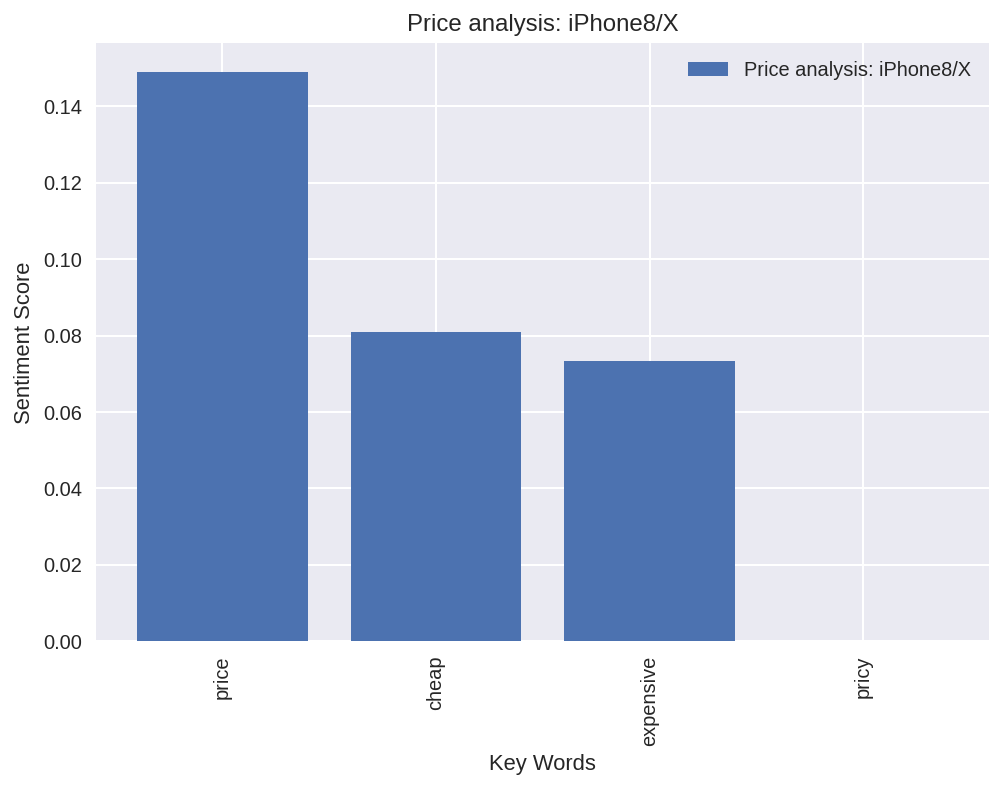

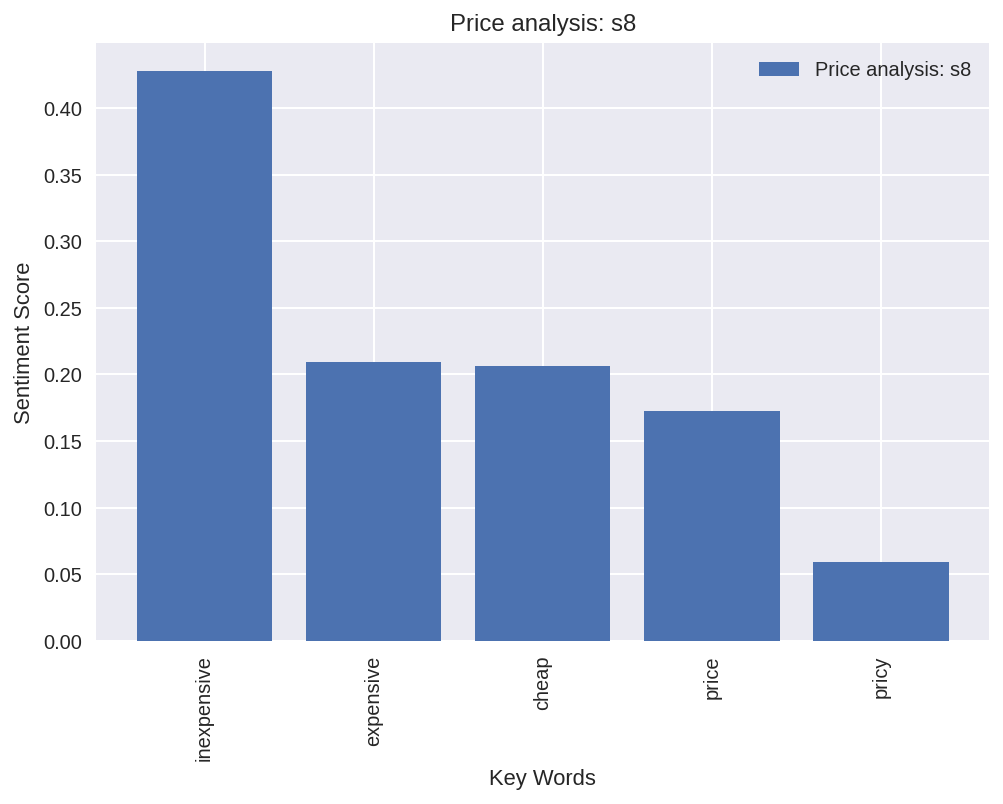

In [ ]:
plotAttributeScore(iphone_price_sen, 'Price analysis: iPhone8/X')
plotAttributeScore(s8_price_sen, 'Price analysis: s8')

In terms of "Price", we found that both iPhone and Galaxy s8 fall around positive 0.15 (iPhone even has a slightly larger figure) which means that overall we are performing pretty well in price setting. One part worth noticing is that Galaxy s8 is having a positive 0.40+ in "inexpensive" which might infer that although we are actually selling at a similar price, consumers might acknowledge Galaxy s8 having better value for money.

### 5.4.2 Value Analysis (Adjective Words)

In [ ]:
word_value = ['good', 'cool', 'beautiful', 'different', 'innovative','similar', 'fast', 'large', 'big', 'late', 'high']
iphone_value_sen = attribute_score(iphone['Sound Bite Text'], word_value)
s8_value_sen = attribute_score(s8['Sound Bite Text'], word_value)

 18%|█▊        | 2/11 [00:17<01:12,  8.03s/it]

In [ ]:
plotAttributeScore(iphone_value_sen, 'Value analysis: iPhone8/X')
plotAttributeScore(s8_value_sen, 'Value analysis: s8')

"Beautiful" is one of iPhone's most frequent words, and not surprisingly, we are having a pretty good sentiment score on it. However, with new designs in display and features, Galaxy s8 outperformed us in almost every aspect, including appearance, innovation, overall feelings in "good" and "different".


### 5.4.3 Quality Analysis (Special for Device Features)

This would be a special focus analysing the device features that customers discuss for each brand. We will pick the top 3 features based on the topic modelling and then conduct a sentiment analysis. If necessary, market research will be used to explain certin sentiment trend.

In [ ]:
#Create method to calculate the average sentiment scores for attributes
def quality_attribute_score(df, word_list):
    count = 0
    score = []
    for tweet in df:
        if any(word in tweet.lower() for word in word_list):
            count += 1
            score.append(GetSentimentScore(tweet))
    plt.hist(score, 5)
    plt.title("Sentiment Score by Count")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Post Count")

**iPhone**

The three selected attributes that we want to focus on are:  camera, battery and design.

##### Camera

In [ ]:
capture_word = ["portrait", "camera", "shotoniphone", "photography", "portraitmode", "shot", "shotoniphone8plus", "photo", "iphonephotography", "iphoneography"]
quality_attribute_score(iphone['Sound Bite Text'], capture_word)

##### Battery


In [ ]:
capture_word = ["wireless", "charging", "battery"]
quality_attribute_score(iphone['Sound Bite Text'], capture_word)

##### Design

In [ ]:
capture_word = ["beautiful", "design", "gold", "silver", "grey", "space", ]
quality_attribute_score(iphone['Sound Bite Text'], capture_word)

**Samsung**

The three selected attributes that we want to focus on are:  bixby voice assistant and snapdragon 835, iris scanning as well as screen (due to Infinity Display)

##### Voice Assistant and Processor

In [ ]:
capture_word = ["bixby", "assistant", "voice", "835", "snapdragon", "processor", "chip"]
quality_attribute_score(s8['Sound Bite Text'], capture_word)

##### Iris Scanning

In [ ]:
capture_word = ["recognition", "unlock", "fingerprint", "scanner", "facial", "face", "security"]
quality_attribute_score(s8['Sound Bite Text'], capture_word)

##### Infinity Edge

In [ ]:
capture_word = ["display", "screen", "inch", "edge"]
quality_attribute_score(s8['Sound Bite Text'], capture_word)

To sum up, we can see that Samsung’s feature generates a great deal of positive sentiments compared to iPhone’s. iPhone's performance has been stable and has maintained its strength in providing beautiful and stylish designs as well as keeping its adequate pricing strategy. Nonetheless, playing safe didn't seem like a perfect idea in creating online buzz in this competition since Samsung successfully won attention from the market by its highly unexpected feature.

# **Step 6: Predictive Analysis**

In this part, we conduct the predictive analysis using self-defined features with generated labels to predict the uptake of iPhone and Samsung products. By trying out two different machine learning models, we evaluate each of their performance with different metrics and provide our suggestion of which model will be a more suitable predictor.

## 6.1 Feature Engineering

To predict the adoption, we extract features that we guess might be associated with uptake of the products, such as text length, sentiment score, and media types mentioned in the post.

In [ ]:
# Add additional feature

# Feature 1: length

df['tokenized text'] = pd.DataFrame(clean_df)
df['Length'] = df['tokenized text'].apply(lambda x: len(str(x).split(" ")))

NameError: ignored

In [ ]:
# Feature 2: Media Types

# df['Media Type'].unique()
media_columns = ['Link', 'Image', 'Video', 'Audio Files']

for media_col in media_columns:
  df[media_col] = np.where(df['Media Type'].str.contains(media_col), 1, 0)

NameError: ignored

In [ ]:
# Labeling "Adoption" (y)
# y = 1: will buy (adopt) ; y = 0: will not buy (not adopt)

def AdoptOrNot(row):
  if ('buy' in str(row['tokenized text'])) & ('never' not in str(row['tokenized text'])):
    return True
  else:
    return False

df['Adoption'] = df.apply(lambda row : AdoptOrNot(row), axis = 1)

In [ ]:
feature_cols = ['Phone_Type', 'After','Length', 'Sentiment_Score', 'Image', 'Video', 'Audio Files', 'Link', 'Adoption']
df_feature = df[feature_cols]
df_feature.head()

In [ ]:
df['Adoption'].value_counts()

In [ ]:
print("iphone before release")
filter = (df_feature["Phone_Type"] == 1) & (df_feature["After"] == 0)
print(df_feature[filter]['Adoption'].value_counts())

print()

print("iphone after release")
filter = (df_feature["Phone_Type"] == 1) & (df_feature["After"] == 1)
print(df_feature[filter]['Adoption'].value_counts())

## 6.2 Prediction of Product Uptake

For the following prediction on the customer adoption or uptake of the product, a few assumptions have been made:
- Labelling of ground truth: When the author indicates they are "buying" in the soundbites, they will be labelled as adopted user i.e. Adoption = 1, else 0
- The labels of the pre-release data and post-relase data should follow similar distribution
- Samsung release does not have a huge impact on the sentiment of iPhone release since there is a half a year gap

In [ ]:
# Extracting iphone observations 

# Training Data
filter = (df_feature["Phone_Type"] == 1) & (df_feature["After"] == 0)
df_iphone_bf = df_feature[filter]

df_iphone_bf_false = df_iphone_bf[df_iphone_bf['Adoption'] == False].sample(n = 4205)
df_iphone_bf_true = df_iphone_bf[df_iphone_bf['Adoption'] == True]

merged_df = pd.concat([df_iphone_bf_false, df_iphone_bf_true])
X_train = merged_df.iloc[:, :-2]
y_train = merged_df.iloc[:, -1]

# Testing Data
filter = (df_feature["Phone_Type"] == 1) & (df_feature["After"] == 1)
df_iphone_af = df_feature[filter]

df_iphone_af_false = df_iphone_af[df_iphone_af['Adoption'] == False].sample(n = 6657)
df_iphone_af_true = df_iphone_af[df_iphone_af['Adoption'] == True]

merged_df = pd.concat([df_iphone_af_false, df_iphone_af_true])
X_test = merged_df.iloc[:, :-2]
y_test = merged_df.iloc[:, -1]

In [ ]:
# class imbalance
train_label_count = Counter(y_train)
test_label_count = Counter(y_test)

print("--training set--")
for key, val in train_label_count.items():
    print(key, val)
    
print()

print("--testing set--")
for key,val in test_label_count.items():
    print(key, val)

## 6.3 Model Fitting

For classification problem, we will use logistic regression as our baseline model, then using random forest classifier to benchmark our performance. In particular, we will tune our random forest hyperparameters to using 5-fold cross validation.

In [ ]:
results = pd.DataFrame(columns = ["Model", "Accuracy", "Precision", "Recall", "ROC_AUC"])

def continuous_score(model_name, previous_results, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))

    model_results = pd.DataFrame([[model_name, accuracy, precision, recall, roc]], columns = ["Model", "Accuracy", "Precision", "Recall", "ROC_AUC"])
    results = previous_results.append(model_results, ignore_index = True)
    
    return results

In [ ]:
# logistic regression
model_name = "Logistic Regression"
final_lr = LogisticRegression(random_state=0)
final_lr.fit(X_train, y_train)
y_pred = final_lr.predict(X_test)
results = continuous_score(model_name, results, y_test, y_pred)

In [ ]:
# Takes 5 minutes to run

# random forest classifier
lowest_cross_val_error = np.inf
best_hyperparameter_setting = None

num_features = X_train.shape[1] 
hyperparameter_settings = [(max_features, min_samples_leaf)
                           for max_features in [int(np.ceil(np.sqrt(num_features) / 2)),
                                                int(np.ceil(np.sqrt(num_features))),
                                                int(np.ceil(np.sqrt(num_features) * 2))]
                           for min_samples_leaf in [1, 2, 4, 8, 16]]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
for hyperparameter_setting in hyperparameter_settings:
    max_features, min_samples_leaf = hyperparameter_setting
    errors = []
    for train_indices, val_indices in kf.split(X_train):
        train_features = X_train.iloc[train_indices]
        train_value = y_train.iloc[train_indices]
        val_features = X_train.iloc[val_indices]
        val_value = y_train.iloc[val_indices]

        classifier = RandomForestClassifier(max_features=max_features,
                                            min_samples_leaf=min_samples_leaf,
                                            random_state=0)
        classifier.fit(train_features, train_value)
        predicted_val_labels = classifier.predict(val_features)
        error = np.mean(predicted_val_labels != val_value)
        errors.append(error)
        
    cross_val_error = np.mean(errors)
    print('Hyperparameter:', hyperparameter_setting, 'cross validation error:', cross_val_error)

    if cross_val_error < lowest_cross_val_error:
        lowest_cross_val_error = cross_val_error
        best_hyperparameter_setting = hyperparameter_setting

print('Best hyperparameter:', best_hyperparameter_setting, 'cross validation error:', lowest_cross_val_error)

In [ ]:
model_name = "Random Forest"
best_max_features, best_min_samples_split = best_hyperparameter_setting
final_rf_classifier = RandomForestClassifier(max_features=best_max_features,
                                             min_samples_leaf=best_min_samples_split,
                                             random_state=0)
final_rf_classifier.fit(X_train, y_train)
y_pred = final_rf_classifier.predict(X_test)
results = continuous_score(model_name, results, y_test, y_pred)
print(results)

In [ ]:
importance = final_rf_classifier.feature_importances_

for i,v in enumerate(importance):
    print("Feature %d: %s, Score: %.5f" % (i, X_test.columns[i],v))

# Plotting the chart in absolute value
fig, ax = plt.subplots(figsize=(5,3), dpi=125)

y_pos = [x for x in range(len(importance))]
bars = [x for x in X_test.columns]
plt.bar(y_pos, abs(importance), color = 'gold')
plt.title("Bar Chart for Feature Importance (Random Forest Classifier)")
plt.xticks(y_pos, bars, rotation=45, horizontalalignment='right')
plt.xlabel("Feature Label")
plt.ylabel("Absolute Coefficient")
plt.show()

While comparing the evaluation result of Logistic Regression and Random Forest Classifier, we discover that although Logistic Regression performs better in terms of Accuracy and Precision, it has a higher False Negative rate than the Random Forest model. We believe that false negative is more sensitive than false positive because that means we will possibly miss a potential customer while he/she will actually adopt our product. In conclusion, we believe that using Random Forest Classifier will better help us predict the uptake of our products.

# **Step 7: Comparison between Twitter and Non-Twitter Dataset**


In [ ]:
# Split twitter & Non twitter
df_non_tweet = df[df["Source Type"] != "Twitter"]
df_tweet  = df[df["Source Type"] ==  "Twitter"] 

## 7.1 Exploratory Data Analysis

1. 60% of non twitter text comes from US, but author country in twitter are more diversed US: 0.38, India 0.12, UK: 0.09, Canada 0.03. 
2. The total No. of text in non-tweet is larger than the total No. of text in tweet (198384 v.s 19100).
3. In both dataset tweet and non-tweet, samasung have more number of text compared to iphone.(No. of iPhone text in non-tweet: 7947; No. of Samsung text in non-tweet: 104771; No. of iPhone text in tweet: 220; No. of Samsung text in tweet: 11207)

In [ ]:
# Drop duplicated text
df_tweet = df_tweet.drop_duplicates(subset = "Sound Bite Text") 
df_non_tweet = df_non_tweet.drop_duplicates(subset = "Sound Bite Text") 

In [ ]:
df_tweet.isna().sum() * 100/len(df_tweet)
df_tweet = df_tweet.dropna(axis = 1, how = 'all')
df_tweet.isna().sum()* 100/len(df_tweet)

In [ ]:
df_non_tweet.isna().sum() * 100/len(df_non_tweet)
df_non_tweet = df_non_tweet.dropna(axis = 1, how = 'all')
df_non_tweet.isna().sum()* 100/len(df_non_tweet)

In [ ]:
# Source of non-twitter
df_non_tweet["Source Type"].value_counts()

In [ ]:
df_non_tweet.info()

In [ ]:
df_tweet.info()

In [ ]:
df_tweet["Post Type"].value_counts()

In [ ]:
df_non_tweet["Post Type"].value_counts()

In [ ]:
df_tweet["Media Type"].value_counts()

In [ ]:
df_non_tweet["Media Type"].value_counts()

In [ ]:
df_tweet["Author Location - Country 1"].value_counts(normalize=True)

In [ ]:
df_non_tweet["Author Location - Country 1"].value_counts(normalize=True)

In [ ]:
print("The total No. of text in tweet:" , len(df_tweet['Sound Bite Text']))
print("No. of iPhone text in tweet:", len(df_tweet[df_tweet["Phone_Type"] == 1]))
print("No. of Samsung text in tweet:", len(df_tweet[df_tweet["Phone_Type"] == 2]))
print("No. of both Samsung and iPhone text in tweet:", len(df_tweet[df_tweet["Phone_Type"] == 3]))
print("No. of non-related text in tweet", len(df_tweet[df_tweet["Phone_Type"] == 0]))

In [ ]:
print("The total No. of text in non-tweet:" , len(df_non_tweet['Sound Bite Text']))
print("No. of iPhone text in non-tweet:", len(df_non_tweet[df_non_tweet["Phone_Type"] == 1]))
print("No. of Samsung text in non-tweet:", len(df_non_tweet[df_non_tweet["Phone_Type"] == 2]))
print("No. of both Samsung and iPhone text in non-tweet:", len(df_non_tweet[df_non_tweet["Phone_Type"] == 3]))
print("No. of non-related text in non-tweet", len(df_non_tweet[df_non_tweet["Phone_Type"] == 0]))

When we want to capture customer opinions on US market, we could use non twitter source. However, when we want to have more diversed or global customer opinions, we should use twitter source.

## 7.2 Word Frequency


1. People care more about iphones color on non twitter. 
2. On twitter, people mention more about funtion adjectives and attach more youtube link. (both iphone & s8)

In [ ]:
#tokenize
clean_tweet_iphone = tokenize_stop(df_tweet[df_tweet["Phone_Type"] == 1])
clean_tweet_s8 = tokenize_stop(df_tweet[df_tweet["Phone_Type"] == 2])
clean_ntweet_iphone = tokenize_stop(df_non_tweet[df_non_tweet["Phone_Type"] == 1])
clean_ntweet_s8 = tokenize_stop(df_non_tweet[df_non_tweet["Phone_Type"] == 2])
#Count words by type for df_tweet iphone
tweet_iphone_simple = wordFrequency(clean_tweet_iphone, 'simple')
tweet_iphone_adj = wordFrequency(clean_tweet_iphone, 'adj')
tweet_iphone_noun = wordFrequency(clean_tweet_iphone, 'noun')
tweet_iphone_verb = wordFrequency(clean_tweet_iphone, 'verb')
#Count words by type for df_tweet s8
tweet_s8_simple = wordFrequency(clean_tweet_s8, 'simple')
tweet_s8_adj = wordFrequency(clean_tweet_s8, 'adj')
tweet_s8_noun = wordFrequency(clean_tweet_s8, 'noun')
tweet_s8_verb = wordFrequency(clean_tweet_s8, 'verb')
#Count words by type for df_non_tweet iphone
ntweet_iphone_simple = wordFrequency(clean_ntweet_iphone, 'simple')
ntweet_iphone_adj = wordFrequency(clean_ntweet_iphone, 'adj')
ntweet_iphone_noun = wordFrequency(clean_ntweet_iphone, 'noun')
ntweet_iphone_verb = wordFrequency(clean_ntweet_iphone, 'verb')
#Count words by type for df_non_tweet s8
ntweet_s8_simple = wordFrequency(clean_ntweet_s8 , 'simple')
ntweet_s8_adj = wordFrequency(clean_ntweet_s8 , 'adj')
ntweet_s8_noun = wordFrequency(clean_ntweet_s8 , 'noun')
ntweet_s8_verb = wordFrequency(clean_ntweet_s8 , 'verb')

In [ ]:
tweet_iphone_adj.most_common(10)

In [ ]:
ntweet_iphone_adj.most_common(10)

In [ ]:
tweet_s8_adj.most_common(10)

In [ ]:
ntweet_s8_adj.most_common(10)

In [ ]:
#Conduct word frquenct plotting for df_tweet iphone
print('iPhone POS Analysis')
plotFrequency(tweet_iphone_simple, 'Overall')
plotFrequency(tweet_iphone_adj, 'Adjective')
plotFrequency(tweet_iphone_noun, 'Noun')
plotFrequency(tweet_iphone_verb, 'Verb')

In [ ]:
#Conduct word frquenct plotting for df_non_tweet iphone
print('iPhone POS Analysis')
plotFrequency(ntweet_iphone_simple, 'Overall')
plotFrequency(ntweet_iphone_adj, 'Adjective')
plotFrequency(ntweet_iphone_noun, 'Noun')
plotFrequency(ntweet_iphone_verb, 'Verb')

In [ ]:
#Conduct word frquenct plotting for df_tweet s8
print('iPhone POS Analysis')
plotFrequency(tweet_s8_simple, 'Overall')
plotFrequency(tweet_s8_adj, 'Adjective')
plotFrequency(tweet_s8_noun, 'Noun')
plotFrequency(tweet_s8_verb, 'Verb')

In [ ]:
#Conduct word frquenct plotting for df_tweet s8
print('iPhone POS Analysis')
plotFrequency(ntweet_s8_simple, 'Overall')
plotFrequency(ntweet_s8_adj, 'Adjective')
plotFrequency(ntweet_s8_noun, 'Noun')
plotFrequency(ntweet_s8_verb, 'Verb')

When advertising on different platfroms, our team should have different strategies. For example, emphasize the apearance and color of iphone on non twitter platform, but mention more about the product function and include video introduction on twitter.

## 7.3 Hashtag

Though two dataset have quite different number and demographic of user, people use similar words of hashtags on both twitter and non twitter.

In [ ]:
# iphone tag on twitter
iphone_tag_twitter_list = hashtag_count(df_tweet[df_tweet["Phone_Type"] ==1]["Sound Bite Text"])
# iphone tag on non twitter
iphone_tag_ntwitter_list = iphone_tag_ntwitter_list = hashtag_count(df_non_tweet[df_non_tweet["Phone_Type"] ==1]["Sound Bite Text"])
# s8 tag on twitter
s8_tag_twitter_list = hashtag_count(df_tweet[df_tweet["Phone_Type"] == 2]["Sound Bite Text"])
# s8 tag on non twitter
s8_tag_ntwitter_list = hashtag_count(df_non_tweet[df_non_tweet["Phone_Type"] == 2]["Sound Bite Text"])

In [ ]:
# Find unique iphone/s8 tag on twitter and nontwitter
list1_as_set = set(iphone_tag_twitter_list)
intersection_1 = list1_as_set.intersection(iphone_tag_ntwitter_list)
uniquetag_iphone_twitter = set(iphone_tag_twitter_list) - intersection_1
uniquetag_iphone_ntwitter = set(iphone_tag_ntwitter_list) - intersection_1
list2_as_set = set(s8_tag_twitter_list)
intersection_2 = list2_as_set.intersection(s8_tag_ntwitter_list)
uniquetag_s8_twitter = set(s8_tag_twitter_list) - intersection_2
uniquetag_s8_ntwitter = set(s8_tag_ntwitter_list) - intersection_2

In [ ]:
# Common tag for iphone on twitter and nontwitter
intersection_1

In [ ]:
# Common tag for s8 on twitter and nontwitter
intersection_2

In [ ]:
uniquetag_iphone_twitter

In [ ]:
uniquetag_iphone_ntwitter

In [ ]:
uniquetag_s8_twitter

In [ ]:
uniquetag_s8_ntwitter

## 7.4 Sentiment Analysis for Product Attributes


1. NonTwitter have more positive adj and noun on top 20 than nontwitter
2. NonTwitter have more positive adj and noun on bottom 20 than twitter

In [ ]:
#Set up top and bottom attributes
tiphone_adj_t = top20(tweet_iphone_adj)
tiphone_noun_t = top20(tweet_iphone_noun)

tiphone_adj_b = bottom20(tweet_iphone_adj)
tiphone_noun_b = bottom20(tweet_iphone_noun)

ts8_adj_t = top20(tweet_s8_adj)
ts8_noun_t = top20(tweet_s8_noun)

ts8_adj_b = bottom20(tweet_s8_adj)
ts8_noun_b = bottom20(tweet_s8_noun)

ntiphone_adj_t = top20(ntweet_iphone_adj)
ntiphone_noun_t = top20(ntweet_iphone_noun)

ntiphone_adj_b = bottom20(ntweet_iphone_adj)
ntiphone_noun_b = bottom20(ntweet_iphone_noun)

nts8_adj_t = top20(ntweet_s8_adj)
nts8_noun_t = top20(ntweet_s8_noun)

nts8_adj_b = bottom20(ntweet_s8_adj)
nts8_noun_b = bottom20(ntweet_s8_noun)
# Compute sentiment score for twitter
tiphone_adj_sen_t = attribute_score(clean_tweet_iphone, tiphone_adj_t)
tiphone_adj_sen_b = attribute_score(clean_tweet_iphone, tiphone_adj_b)
tiphone_noun_sen_t = attribute_score(clean_tweet_iphone, tiphone_noun_t)
tiphone_noun_sen_b = attribute_score(clean_tweet_iphone, tiphone_noun_b)
# Compute sentiment score non twitter
ntiphone_adj_sen_t = attribute_score(clean_ntweet_iphone, ntiphone_adj_t)
ntiphone_adj_sen_b = attribute_score(clean_ntweet_iphone, ntiphone_adj_b)
ntiphone_noun_sen_t = attribute_score(clean_ntweet_iphone, ntiphone_noun_t)
ntiphone_noun_sen_b = attribute_score(clean_ntweet_iphone, ntiphone_noun_b)

In [ ]:
# NonTwitter have more positive adj and noun on top 20 than nontwitter
plotAttributeScore(tiphone_adj_sen_t, 'adjective')
plotAttributeScore(ntiphone_adj_sen_t, 'adjective')
plotAttributeScore(tiphone_noun_sen_t, 'noun')
plotAttributeScore(ntiphone_noun_sen_t, 'noun')

In [ ]:
# NonTwitter have more positive adj and noun on bottom 20 than twitter
plotAttributeScore(tiphone_adj_sen_b, 'adjective')
plotAttributeScore(ntiphone_adj_sen_b, 'adjective')
plotAttributeScore(tiphone_noun_sen_b, 'noun')
plotAttributeScore(ntiphone_noun_sen_b, 'noun')

When we want to hear more complete voice (including both positive and negative one) from customers, we may need to use twitter datasets.

# **Step 8: Recommendation**


**A Strategy for Every Phase**

From the preceding analysis, we have identified five key recommendations, which we will execute at each stage of the product development life-cycle for each new product. The recommendations are as follows: 

8.0 Development: Attribute Enhancement
8.1 Introduction: Informative Marketing
8.2 Growth: Persuasive Marketing: Persuasive Marketing
8.3 Maturity: Product Consolidation
8.4 Decline: Pivoting
0. Development: Attribute Enhancement
1. Introduction: Informative Marketing
2. Growth: Persuasive Marketing
3. Maturity: Consolidation
4. Decline: Pivoting

![image info](./gdrive/MyDrive/Colab Notebooks/)

## 8.0 Development: Attribute Enhancement

The first recommendation is that we should be more proactive in improving our product attributes. This strategy will be executed during the product development phase. We discovered that Samsung and Apple have similar market shares and product price points after doing more investigation. Despite the fact that we had fantastic features such as great product appearance and great cameras, Samsung was able to outperform us due to a few key big flagship advancements, such as the infinity display and the current Snapdragon 835 CPU, among other things. Our iPhone X debut was quite similar, with more people praising the new Gold look, as well as the multiple cameras and wireless charging battery capabilities. These features give customers a sense of “upgrade” and freshness, which creates excitement and buzz for Samsung and Apple, and creates anticipation for the next launch. As a result, we should focus on improving year after year in order to keep existing clients and attract new ones, particularly with an emphasis to create a sleek design and be different, as extracted from the analysis results.

## 8.1 Preparation: Informative Marketing

A strategy for every phase

From the preceding analysis, we have identified five key recommendations, which we will execute at each stage of the product development life-cycle for each new product. The recommendations are as follows: 1) Attribute Enhancement, 2) Informative Marketing  3) Persuasive Marketing 4) Consolidation 5) Pivoting .

Attribute Enhancement

The first recommendation is that we should be more proactive in improving our product attributes. This strategy will be executed during the product development phase. We discovered that Samsung and Apple have similar market shares and product price points after doing more investigation. Despite the fact that we had fantastic features such as great product appearance and great cameras, Samsung was able to outperform us due to a few key big flagship advancements, such as the infinity display and the current Snapdragon 835 CPU, among other things. Our iPhone X debut was quite similar, with more people praising the new Gold look, as well as the multiple cameras and wireless charging battery capabilities. These features give customers a sense of “upgrade” and freshness, which creates excitement and buzz for Samsung and Apple, and creates anticipation for the next launch. As a result, we should focus on improving year after year in order to keep existing clients and attract new ones, particularly with an emphasis to create a sleek design and be different, as extracted from the analysis results.

Informative Marketing

Apple should focus on informative marketing in the introduction phase. At this stage, our product is still new and customers need time to learn about it. We'll invite influencers to launch events and use community engagement to drive excitement. During this phase, we will target early adopters and loyal customers, and engage them in focus groups. We will use the information we extracted from attribute and sentiment analysis to find out quality information on what customers truly think about those aspects, and make changes on the products as much as possible.

Persuasive Marketing

In addition to the above, we should incorporate advanced marketing tools to further tap on the launch of our products during the Growth stage. The product is beginning to gain traction and getting noticed by consumers. Understanding our customers needs and wants is essential for us to succeed. Our predictive algorithm allows us to forecast whether a potential customer will purchase the product when it launches. We recognize the importance of privacy and take it very seriously. To that end, we will only extract publicly available posts incorporating the use of relevant key hashtags, for example #iphone etc. We will then aggregate the proportion of potential buyers against the entire market. We will then tweak our marketing strategy accordingly, say to promote more features that the customers care about, or further spread positive anticipated features that customers are excited about to maximize the network externality effect.

Product Consolidation

We'll start consolidating market share after we've reached maturity, and we'll start summarizing critical takeaways. The market is becoming saturated, and there is a lot of critical information available. We can figure out what people liked about the product and what their pain points were using our analysis. We may begin studying new product development ideas and including the community in the process using this knowledge. Focus groups could be formed to get their feedback on what they desire from their product. We can organize a design/features competition, for example, and collect useful information for future product attribute enhancements.

Pivoting

Lastly, as the product reaches the end of its life, we will try to pivot the remaining customers over to our newer products. We will communicate early to give users time and prepare them for the termination of this product. Apart from that, we can provide incentives for people to change, with discounts from trade-in and provide additional benefits such as a month subscription to Apple Music etc.

Conclusion

Overall, every product is a marketing opportunity, and we will do everything we can to maximize its benefits. We believe that if these suggestions are implemented correctly, Apple will be able to reach new heights and maintain its position as the world's leading phone and tecnological manufacturer.

# **Contribution**



**Ashlyn Im**: Data Preprocessing, Topic Modelling, Predictive Modelling, Recommendation<br>
**Linda Hung**: Data Preprocessing, Hashtag Analysis, Sentiment Analysis, Twitter Comparison, PDF<br>
**Shih-Ting Sun**: POS Tagging, Word Frequency, In-depth Attribute Insights, Attribute Sentiment Analysis<br>
**Wan-Ju Yu**: Demographic Analysis, Feature Engineering, Prediction of Product Update, PDF